<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
import pycaret
import warnings
import sklearn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.dates import DateFormatter

from sklearn import metrics
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from pycaret.regression import *

%matplotlib inline

warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
df = pd.read_csv("country_vaccinations.csv")
df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

In [3]:
df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [4]:
print("Number of data ",df.shape)

Number of data  (31240, 15)


In [5]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [6]:
# Convert date from object to datetime format-------------------------------------------------
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df

# Create date columns for analizer
le = preprocessing.LabelEncoder()
df['Day_num'] = le.fit_transform(df.date)
df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df

country iso_code       date  total_vaccinations  people_vaccinated  \
0      Afghanistan      AFG 2021-02-22                 0.0                0.0   
1      Afghanistan      AFG 2021-02-23                 NaN                NaN   
2      Afghanistan      AFG 2021-02-24                 NaN                NaN   
3      Afghanistan      AFG 2021-02-25                 NaN                NaN   
4      Afghanistan      AFG 2021-02-26                 NaN                NaN   
...            ...      ...        ...                 ...                ...   
31235     Zimbabwe      ZWE 2021-07-11           1491397.0           895980.0   
31236     Zimbabwe      ZWE 2021-07-12           1531868.0           926312.0   
31237     Zimbabwe      ZWE 2021-07-13           1575539.0           955656.0   
31238     Zimbabwe      ZWE 2021-07-14           1613640.0           988746.0   
31239     Zimbabwe      ZWE 2021-07-15           1666862.0          1036252.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                          NaN                     NaN                 NaN   
1                          NaN                     NaN              1367.0   
2                          NaN                     NaN              1367.0   
3                          NaN                     NaN              1367.0   
4                          NaN                     NaN              1367.0   
...                        ...                     ...                 ...   
31235                 595417.0                     NaN             18598.0   
31236                 605556.0                 40471.0             23205.0   
31237                 619883.0                 43671.0             27567.0   
31238                 624894.0                 38101.0             30698.0   
31239                 630610.0                 53222.0             33326.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                0.00                           0.00   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
31235                           10.03                           6.03   
31236                           10.31                           6.23   
31237                           10.60                           6.43   
31238                           10.86                           6.65   
31239                           11.21                           6.97   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                      NaN                             NaN   
1                                      NaN                            35.0   
2                                      NaN                            35.0   
3                                      NaN                            35.0   
4                                      NaN                            35.0   
...                                    ...                             ...   
31235                                 4.01                          1251.0   
31236                                 4.07                          1561.0   
31237                                 4.17                          1855.0   
31238                                 4.20                          2065.0   
31239                                 4.24                          2242.0   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              31240 non-null  object        
 1   iso_code                             31240 non-null  object        
 2   date                                 31240 non-null  datetime64[ns]
 3   total_vaccinations                   17451 non-null  float64       
 4   people_vaccinated                    16554 non-null  float64       
 5   people_fully_vaccinated              13795 non-null  float64       
 6   daily_vaccinations_raw               14421 non-null  float64       
 7   daily_vaccinations                   30948 non-null  float64       
 8   total_vaccinations_per_hundred       17451 non-null  float64       
 9   people_vaccinated_per_hundred        16554 non-null  float64       
 10  people_ful

## EDA

In [8]:
df.describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        1.745100e+04       1.655400e+04             1.379500e+04   
mean         1.200444e+07       5.704551e+06             3.293973e+06   
std          6.622349e+07       2.101612e+07             1.234425e+07   
min          0.000000e+00       0.000000e+00             1.000000e+00   
25%          1.262015e+05       9.999100e+04             4.832450e+04   
50%          8.890780e+05       6.450395e+05             3.632100e+05   
75%          4.213660e+06       2.809300e+06             1.635366e+06   
max          1.426347e+09       6.220000e+08             2.232990e+08   

       daily_vaccinations_raw  daily_vaccinations  \
count            1.442100e+04        3.094800e+04   
mean             2.273661e+05        1.149718e+05   
std              1.258556e+06        8.460548e+05   
min              0.000000e+00        0.000000e+00   
25%              4.324000e+03        8.520000e+02   
50%              2.133600e+04        6.471000e+03   
75%              9.441700e+04        3.545425e+04   
max              2.474100e+07        2.242429e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    17451.000000                   16554.000000   
mean                        29.283554                      19.181574   
std                         35.042304                      20.734193   
min                          0.000000                       0.000000   
25%                          2.970000                       2.580000   
50%                         14.510000                      10.730000   
75%                         44.460000                      30.890000   
max                        232.350000                     116.660000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
count                         13795.000000                    30948.000000   
mean                             12.340698                     3426.365969   
std                              15.857682                     4572.377684   
min                               0.000000                        0.000000   
25%                               1.320000                      412.000000   
50%                               5.560000                     1851.000000   
75%                              17.610000                     5123.000000   
max                             115.690000                   118759.000000   

            Day_num           Day         Month          Year  
count  31240.000000  31240.000000  31240.000000  31240.000000  
mean     141.964052     15.437676      4.406530   2020.986460  
std       51.457768      8.800699      1.886357      0.115574  
min        0.000000      1.000000      1.000000   2020.000000  
25%      104.000000      8.000000      3.000000   2021.000000  
50%      147.000000     15.000000      4.000000   2021.000000  
75%      185.000000     23.000000      6.000000   2021.000000  
max      225.000000     31.000000     12.000000   2021.000000

In [9]:
df[['country','daily_vaccinations','daily_vaccinations_per_million','vaccines']][10:25]

country  daily_vaccinations  daily_vaccinations_per_million  \
10  Afghanistan              2221.0                            57.0   
11  Afghanistan              2435.0                            63.0   
12  Afghanistan              2649.0                            68.0   
13  Afghanistan              2862.0                            74.0   
14  Afghanistan              2862.0                            74.0   
15  Afghanistan              2862.0                            74.0   
16  Afghanistan              2862.0                            74.0   
17  Afghanistan              2862.0                            74.0   
18  Afghanistan              2862.0                            74.0   
19  Afghanistan              2862.0                            74.0   
20  Afghanistan              2862.0                            74.0   
21  Afghanistan              2862.0                            74.0   
22  Afghanistan              2862.0                            74.0   
23  Afghanistan              2882.0                            74.0   
24  Afghanistan              2902.0                            75.0   

                                             vaccines  
10  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
11  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
12  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
13  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
14  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
15  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
16  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
17  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
18  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
19  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
20  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
21  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
22  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
23  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
24  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...

In [10]:
df['country'].value_counts()

Norway                              226
Latvia                              224
England                             220
Scotland                            220
Northern Ireland                    215
Wales                               215
United Kingdom                      215
Canada                              214
Russia                              213
China                               213
Denmark                             211
Israel                              209
United States                       208
Qatar                               206
Switzerland                         206
Liechtenstein                       206
Bahrain                             205
Mexico                              203
Costa Rica                          202
Cayman Islands                      202
Romania                             201
Lithuania                           201
Germany                             201
Czechia                             201
Portugal                            201


In [11]:
df['country'].value_counts(normalize=True)* 100

Norway                              0.723431
Latvia                              0.717029
England                             0.704225
Scotland                            0.704225
Northern Ireland                    0.688220
Wales                               0.688220
United Kingdom                      0.688220
Canada                              0.685019
Russia                              0.681818
China                               0.681818
Denmark                             0.675416
Israel                              0.669014
United States                       0.665813
Qatar                               0.659411
Switzerland                         0.659411
Liechtenstein                       0.659411
Bahrain                             0.656210
Mexico                              0.649808
Costa Rica                          0.646607
Cayman Islands                      0.646607
Romania                             0.643406
Lithuania                           0.643406
Germany   

In [12]:
df['vaccines'].value_counts()

Oxford/AstraZeneca                                                                             4805
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                  4118
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                                   2588
Oxford/AstraZeneca, Sinopharm/Beijing                                                          2368
Oxford/AstraZeneca, Pfizer/BioNTech                                                            2058
Moderna, Pfizer/BioNTech                                                                       1480
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                              1447
Pfizer/BioNTech                                                                                1155
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                                   1029
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V                                         657


In [13]:
df['vaccines'].value_counts(normalize=True)* 100

Oxford/AstraZeneca                                                                             15.380922
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                  13.181818
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                                    8.284251
Oxford/AstraZeneca, Sinopharm/Beijing                                                           7.580026
Oxford/AstraZeneca, Pfizer/BioNTech                                                             6.587708
Moderna, Pfizer/BioNTech                                                                        4.737516
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                               4.631882
Pfizer/BioNTech                                                                                 3.697183
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                                    3.293854
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V

In [14]:
df['date'].value_counts()

2021-06-02    209
2021-06-03    209
2021-06-04    209
2021-06-05    209
2021-06-06    209
2021-06-10    209
2021-06-15    208
2021-06-13    208
2021-05-25    208
2021-05-26    208
2021-05-27    208
2021-06-01    208
2021-06-07    208
2021-06-08    208
2021-06-09    208
2021-06-12    208
2021-06-11    208
2021-06-21    208
2021-06-14    207
2021-05-17    207
2021-05-24    207
2021-05-12    207
2021-05-28    207
2021-05-21    207
2021-05-20    207
2021-05-31    207
2021-06-16    207
2021-05-16    207
2021-05-18    207
2021-06-20    207
2021-06-19    207
2021-06-18    207
2021-06-17    207
2021-05-22    207
2021-05-23    207
2021-05-15    206
2021-05-19    206
2021-05-14    206
2021-05-13    206
2021-05-30    206
2021-05-29    206
2021-06-22    206
2021-06-23    206
2021-06-24    204
2021-06-25    204
2021-06-26    203
2021-06-27    203
2021-06-28    203
2021-05-11    201
2021-05-09    201
2021-05-10    201
2021-06-29    200
2021-05-08    199
2021-05-07    199
2021-05-05    199
2021-05-04

In [15]:
df['source_name'].value_counts()

Ministry of Health                                                 7784
World Health Organization                                          5403
Government of the United Kingdom                                   1085
SPC Public Health Division                                         1038
Pan American Health Organization                                    717
Africa Centres for Disease Control and Prevention                   533
Federal Office of Public Health                                     412
Ministry of Public Health                                           357
Norwegian Institute of Public Health                                226
National Health Service                                             224
Official data from provinces via covid19tracker.ca                  214
Official data from local governments via gogov.ru                   213
National Health Commission                                          213
Statens Serum Institute                                         

In [16]:
df['source_website'].value_counts()

https://covid19.who.int/                                                                                                                                                             5139
https://coronavirus.data.gov.uk/details/vaccinations                                                                                                                                 1085
https://stats.pacificdata.org/vis?tm=covid&pg=0&df[ds]=SPC2&df[id]=DF_COVID_VACCINATION&df[ag]=SPC&df[vs]=1.0                                                                        1038
https://ais.paho.org/imm/IM_DosisAdmin-Vacunacion.asp                                                                                                                                 451
https://africacdc.org/covid-19-vaccination/                                                                                                                                           420
https://www.fhi.no/sv/vaksine/koronavaksinasjonsprogrammet/koronavaksi

In [17]:
pd.crosstab( df.country, df.vaccines)

vaccines                          Abdala, Soberana02  \
country                                                
Afghanistan                                        0   
Albania                                            0   
Algeria                                            0   
Andorra                                            0   
Angola                                             0   
Anguilla                                           0   
Antigua and Barbuda                                0   
Argentina                                          0   
Armenia                                            0   
Aruba                                              0   
Australia                                          0   
Austria                                            0   
Azerbaijan                                         0   
Bahamas                                            0   
Bahrain                                            0   
Bangladesh                                         0   
Barbados                                           0   
Belarus                                            0   
Belgium                                            0   
Belize                                             0   
Benin                                              0   
Bermuda                                            0   
Bhutan                                             0   
Bolivia                                            0   
Bonaire Sint Eustatius and Saba                    0   
Bosnia and Herzegovina                             0   
Botswana                                           0   
Brazil                                             0   
British Virgin Islands                             0   
Brunei                                             0   
Bulgaria                                           0   
Burkina Faso                                       0   
Cambodia                                           0   
Cameroon                                           0   
Canada                                             0   
Cape Verde                                         0   
Cayman Islands                                     0   
Central African Republic                           0   
Chad                                               0   
Chile                                              0   
China                                              0   
Colombia                                           0   
Comoros                                            0   
Congo                                              0   
Cook Islands                                       0   
Costa Rica                                         0   
Cote d'Ivoire                                      0   
Croatia                                            0   
Cuba                                              57   
Curacao                                            0   
Cyprus                                             0   
Czechia                                            0   
Democratic Republic of Congo                       0   
Denmark                                            0   
Djibouti                                           0   
Dominica                                           0   
Dominican Republic                                 0   
Ecuador                                            0   
Egypt                                              0   
El Salvador                                        0   
England                                            0   
Equatorial Guinea                                  0   
Estonia                                            0   
Eswatini                                           0   
Ethiopia                                           0   
Faeroe Islands                                     0   
Falkland Islands                                   0   
Fiji                                               0   
Finland                                            0   
France                  

In [18]:
# Last people vaccinated in United States
print("Last people vaccinated in United States\n", 
      df[df['country'] == 'United States'][['people_vaccinated']].tail(1))

Last people vaccinated in United States
        people_vaccinated
30055        185135757.0


In [19]:
# Last people vaccinated in India
print("Last people vaccinated in India\n", 
      df[df['country'] == 'India'][['people_vaccinated']].tail(1))

Last people vaccinated in India
        people_vaccinated
12922        313529502.0


In [20]:
# Last people vaccinated in Iran
print("Last people vaccinated in Iran\n", 
      df[df['country'] == 'Iran'][['people_vaccinated']].tail(1))

Last people vaccinated in Iran
        people_vaccinated
13263          4390342.0


In [21]:
good_countries = df[ df.daily_vaccinations >= 5000000 ]

In [22]:
good_countries

country iso_code       date  total_vaccinations  people_vaccinated  \
5665    China      CHN 2021-04-01        1.266160e+08                NaN   
5666    China      CHN 2021-04-02        1.338010e+08                NaN   
5691    China      CHN 2021-04-27        2.359760e+08                NaN   
5692    China      CHN 2021-04-28        2.439050e+08                NaN   
5693    China      CHN 2021-04-29        2.534630e+08                NaN   
5694    China      CHN 2021-04-30        2.650640e+08                NaN   
5695    China      CHN 2021-05-01        2.704060e+08                NaN   
5696    China      CHN 2021-05-02        2.753380e+08                NaN   
5697    China      CHN 2021-05-03        2.799050e+08                NaN   
5698    China      CHN 2021-05-04        2.845950e+08                NaN   
5699    China      CHN 2021-05-05        2.896270e+08                NaN   
5700    China      CHN 2021-05-06        2.977340e+08                NaN   
5701    China      CHN 2021-05-07        3.082260e+08                NaN   
5702    China      CHN 2021-05-08        3.175860e+08                NaN   
5703    China      CHN 2021-05-09        3.243070e+08                NaN   
5704    China      CHN 2021-05-10        3.329640e+08                NaN   
5705    China      CHN 2021-05-11        3.426970e+08                NaN   
5706    China      CHN 2021-05-12        3.542720e+08                NaN   
5707    China      CHN 2021-05-13        3.669100e+08                NaN   
5708    China      CHN 2021-05-14        3.806330e+08                NaN   
5709    China      CHN 2021-05-15        3.929870e+08                NaN   
5710    China      CHN 2021-05-16        4.069380e+08                NaN   
5711    China      CHN 2021-05-17        4.219910e+08                NaN   
5712    China      CHN 2021-05-18        4.356890e+08                NaN   
5713    China      CHN 2021-05-19        4.495110e+08                NaN   
5714    China      CHN 2021-05-20        4.666980e+08                NaN   
5715    China      CHN 2021-05-21        4.833430e+08                NaN   
5716    China      CHN 2021-05-22        4.972720e+08                NaN   
5717    China      CHN 2021-05-23        5.108580e+08                NaN   
5718    China      CHN 2021-05-24        5.272530e+08                NaN   
5719    China      CHN 2021-05-25        5.467140e+08                NaN   
5720    China      CHN 2021-05-26        5.667230e+08                NaN   
5721    China      CHN 2021-05-27        5.843600e+08                NaN   
5722    China      CHN 2021-05-28        6.029910e+08                NaN   
5723    China      CHN 2021-05-29        6.209740e+08                NaN   
5724    China      CHN 2021-05-30        6.391720e+08                NaN   
5725    China      CHN 2021-05-31        6.614680e+08                NaN   
5726    China      CHN 2021-06-01        6.819080e+08                NaN   
5727    China      CHN 2021-06-02        7.048260e+08                NaN   
5728    China      CHN 2021-06-03        7.234860e+08                NaN   
5729    China      CHN 2021-06-04        7.444830e+08                NaN   
5730    China      CHN 2021-06-05        7.630650e+08                NaN   
5731    China      CHN 2021-06-06        7.778790e+08                NaN   
5732    China      CHN 2021-06-07        7.941340e+08                NaN   
5733    China      CHN 2021-06-08        8.089620e+08                NaN   
5734    China      CHN 2021-06-09        8.248560e+08                NaN   
5735    China      CHN 2021-06-10        8.452990e+08        622000000.0   
5736    China      CHN 2021-06-11        8.635130e+08                NaN   
5737    China      CHN 2021-06-12        8.785230e+08                NaN   
5738    China      CHN 2021-06-13        8.927700e+08                NaN   
5739    China      CHN 2021-06-14        9.041340e+08                NaN   
5740    China      CHN 2021-06-15        9.239100e+08 

In [23]:
len( good_countries )

91

In [24]:
df[ df.daily_vaccinations >= 5000000 ][['country','daily_vaccinations','daily_vaccinations_per_million','vaccines']]

country  daily_vaccinations  daily_vaccinations_per_million  \
5665    China           5038571.0                          3501.0   
5666    China           5190143.0                          3606.0   
5691    China           5289429.0                          3675.0   
5692    China           5673429.0                          3942.0   
5693    China           6034286.0                          4192.0   
5694    China           6997143.0                          4861.0   
5695    China           7156714.0                          4972.0   
5696    China           7205286.0                          5006.0   
5697    China           7202286.0                          5004.0   
5698    China           6945571.0                          4826.0   
5699    China           6531714.0                          4538.0   
5700    China           6324429.0                          4394.0   
5701    China           6166000.0                          4284.0   
5702    China           6740000.0                          4683.0   
5703    China           6995571.0                          4860.0   
5704    China           7579857.0                          5266.0   
5705    China           8300286.0                          5767.0   
5706    China           9235000.0                          6416.0   
5707    China           9882286.0                          6866.0   
5708    China          10343857.0                          7187.0   
5709    China          10771571.0                          7484.0   
5710    China          11804429.0                          8201.0   
5711    China          12718143.0                          8836.0   
5712    China          13284571.0                          9230.0   
5713    China          13605571.0                          9453.0   
5714    China          14255429.0                          9904.0   
5715    China          14672857.0                         10194.0   
5716    China          14897857.0                         10351.0   
5717    China          14845714.0                         10314.0   
5718    China          15037429.0                         10448.0   
5719    China          15860714.0                         11020.0   
5720    China          16744571.0                         11634.0   
5721    China          16808857.0                         11678.0   
5722    China          17092571.0                         11875.0   
5723    China          17671714.0                         12278.0   
5724    China          18330571.0                         12736.0   
5725    China          19173571.0                         13321.0   
5726    China          19313429.0                         13418.0   
5727    China          19729000.0                         13707.0   
5728    China          19875143.0                         13809.0   
5729    China          20213143.0                         14043.0   
5730    China          20298714.0                         14103.0   
5731    China          19815286.0                         13767.0   
5732    China          18952286.0                         13167.0   
5733    China          18150571.0                         12610.0   
5734    China          17147143.0                         11913.0   
5735    China          17401857.0                         12090.0   
5736    China          17004286.0                         11814.0   
5737    China          16494000.0                         11460.0   
5738    China          16413000.0                         11403.0   
5739    China          15714286.0                         10918.0   
5740    China          16421143.0                         11409.0   
5741    China          17184857.0                         11940.0   
5742    China          17336143.0                         12045.0   
5743    China          18106286.0                         12580.0   
5744    China          18852286.0                         13098.0   
5745    China          19493286.0                         13543.0   
5746

In [25]:
df[ df.daily_vaccinations >= 5000000 ]["country"].value_counts( )

China    82
India     9
Name: country, dtype: int64

In [26]:
df[ df.daily_vaccinations >= 5000000 ]["vaccines"].value_counts( )

CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac    82
Covaxin, Oxford/AstraZeneca, Sputnik V                   9
Name: vaccines, dtype: int64

In [27]:
df[ df.daily_vaccinations >= 1000000 ]["country"].value_counts( )

United States    152
China            137
India            129
Brazil            39
Japan             33
Turkey             6
Name: country, dtype: int64

In [28]:
df[ df.daily_vaccinations >= 1000000 ]["vaccines"].value_counts( )

Johnson&Johnson, Moderna, Pfizer/BioNTech                        152
CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac             137
Covaxin, Oxford/AstraZeneca, Sputnik V                           129
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac     39
Moderna, Pfizer/BioNTech                                          33
Pfizer/BioNTech, Sinovac                                           6
Name: vaccines, dtype: int64

## Data Preprocessing

In [29]:
# Check for missing values
df.isnull()

country  iso_code   date  total_vaccinations  people_vaccinated  \
0        False     False  False               False              False   
1        False     False  False                True               True   
2        False     False  False                True               True   
3        False     False  False                True               True   
4        False     False  False                True               True   
...        ...       ...    ...                 ...                ...   
31235    False     False  False               False              False   
31236    False     False  False               False              False   
31237    False     False  False               False              False   
31238    False     False  False               False              False   
31239    False     False  False               False              False   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                         True                    True                True   
1                         True                    True               False   
2                         True                    True               False   
3                         True                    True               False   
4                         True                    True               False   
...                        ...                     ...                 ...   
31235                    False                    True               False   
31236                    False                   False               False   
31237                    False                   False               False   
31238                    False                   False               False   
31239                    False                   False               False   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                               False                          False   
1                                True                           True   
2                                True                           True   
3                                True                           True   
4                                True                           True   
...                               ...                            ...   
31235                           False                          False   
31236                           False                          False   
31237                           False                          False   
31238                           False                          False   
31239                           False                          False   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                     True                            True   
1                                     True                           False   
2                                     True                           False   
3                                     True                           False   
4                                     True                           False   
...                                    ...                             ...   
31235                                False                           False   
31236                                False                           False   
31237                                False                           False   
31238                                False                           False   
31239                                False                           False   

       vaccines  source_name  source_website  Day_num    Day  Month   Year  
0         False        False           False    False  False  False  False  
1         False        False           False    False  False  False  False  
2         False        False           False    False  False  False  False  
3         False        False           False    False  False  False  Fa

In [30]:
# Check for missing values
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
Day_num                                    0
Day                                        0
Month                                      0
Year                                       0
dtype: int64

In [31]:
df.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
Day_num                                         int64
Day                                             int64
Month                                           int64
Year                        

Methods of dealing with data frame with incomplete data are specified in 'prepare Data for Machine learning' section

## Strorytelling - Visualization

Text(0, 0.5, 'total_vaccinations')

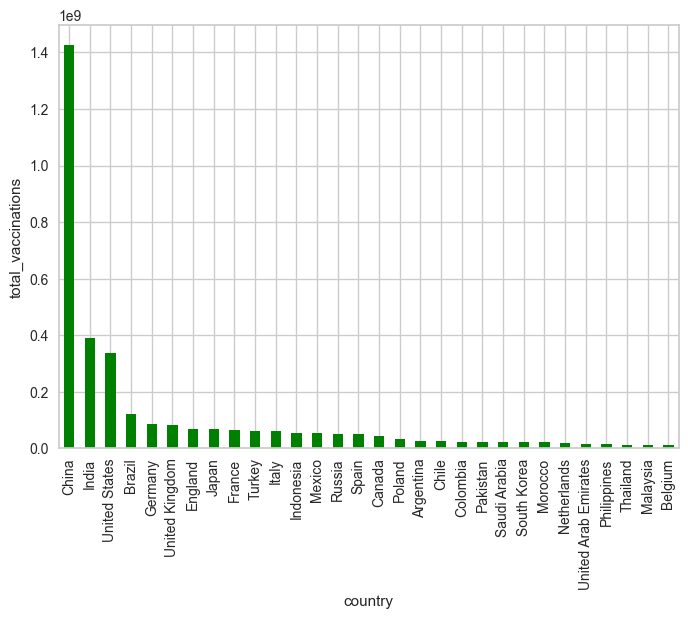

In [32]:
# 20 Country sort max Total Vaccinations
count_total_v = df.groupby(['country'])['total_vaccinations'].max().sort_values(ascending = False).head(30)
count_total_v
count_total_v.plot(kind = 'bar',color='green')
plt.xlabel('country')
plt.ylabel('total_vaccinations')

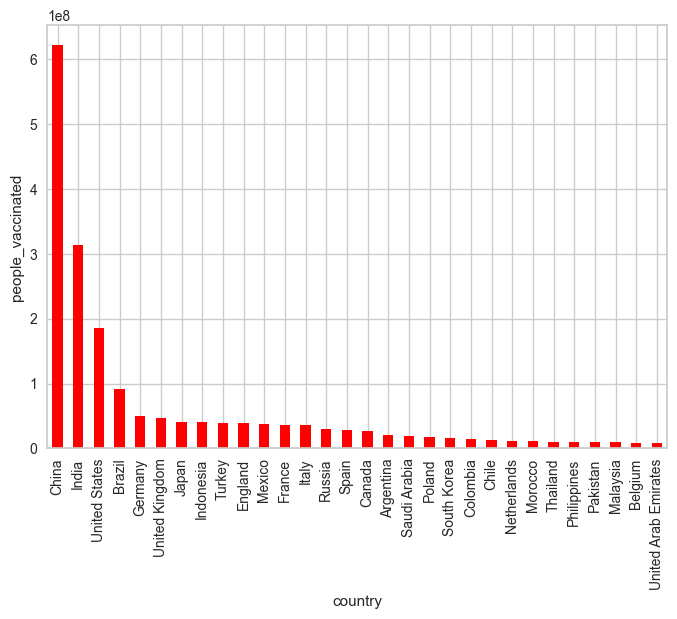

In [33]:
# vaccinated people (get one  or two dose)
people_vac = df.groupby(['country'])['people_vaccinated'].max().sort_values(ascending = False).head(30)
people_vac.plot(kind = 'bar',color='red')
plt.xlabel('country')
plt.ylabel('people_vaccinated')
plt.show()

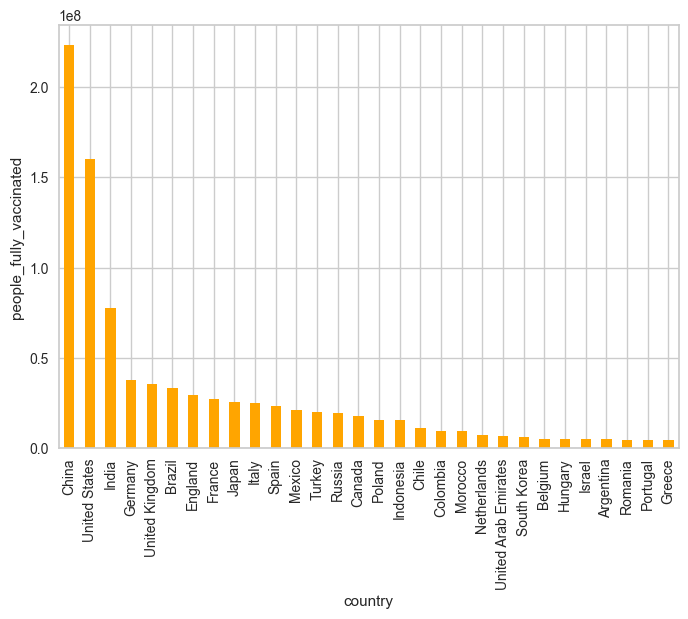

In [34]:
# people_fully_vaccinated(get two dose vaccine)
ful_vac = df.groupby(['country'])['people_fully_vaccinated'].max().sort_values(ascending = False).head(30)
ful_vac.plot(kind = 'bar',color='orange')
plt.xlabel('country')
plt.ylabel('people_fully_vaccinated')
plt.show()

[Text(0.5, 1.0, 'daily_vaccinations in United States')]

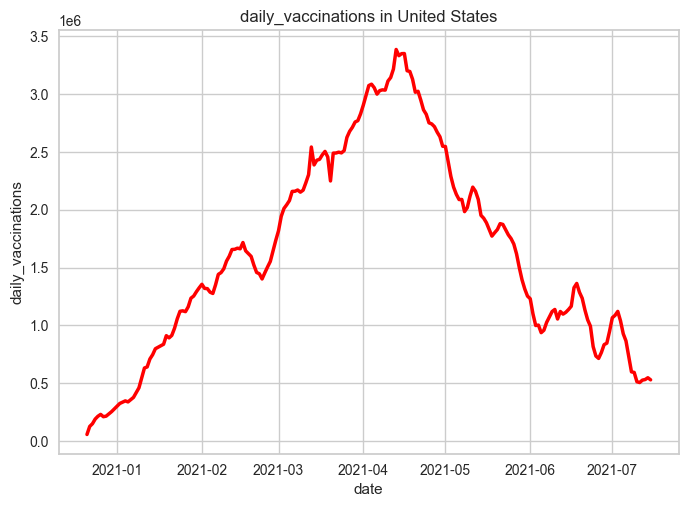

In [35]:
# daily_vaccinations in United States 

Dai_Vac = df[df['country'] =='United States']
sns.lineplot(data =Dai_Vac, x='date', y='daily_vaccinations', linewidth=2.5,color='red').set(title='daily_vaccinations in United States')



[Text(0.5, 1.0, 'daily_vaccinations in India')]

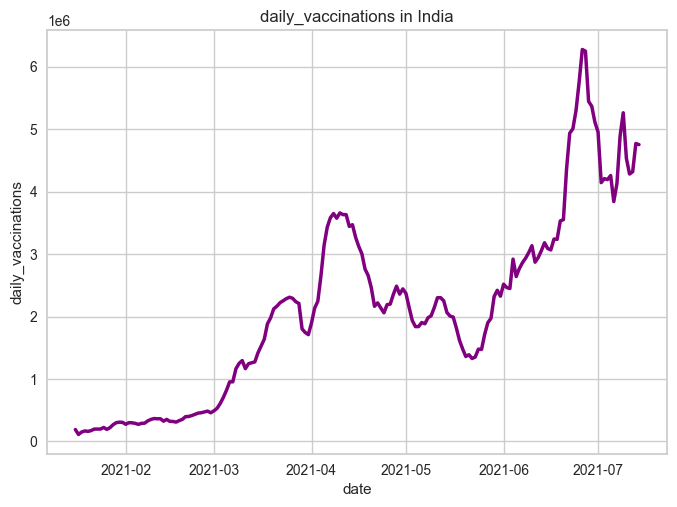

In [36]:
# daily_vaccinations in India 

Dai_Vac = df[df['country'] =='India']
sns.lineplot(data =Dai_Vac, x='date', y='daily_vaccinations', linewidth=2.5,color='purple').set(title='daily_vaccinations in India')



[Text(0.5, 1.0, 'daily_vaccinations in China')]

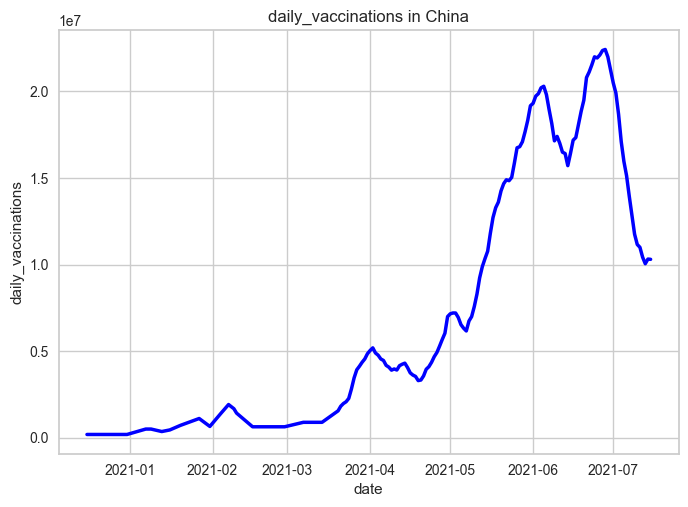

In [37]:
# daily_vaccinations in China 

Dai_Vac = df[df['country'] =='China']
sns.lineplot(data =Dai_Vac, x='date', y='daily_vaccinations', linewidth=2.5,color='blue').set(title='daily_vaccinations in China')



[Text(0.5, 1.0, 'daily_vaccinations in Iran')]

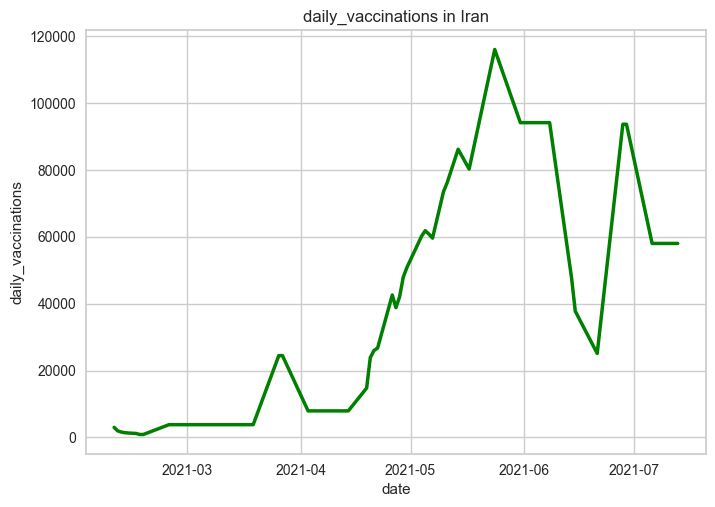

In [38]:
# daily_vaccinations in iran 

Dai_Vac = df[df['country'] =='Iran']
sns.lineplot(data =Dai_Vac, x='date', y='daily_vaccinations', linewidth=2.5,color='green').set(title='daily_vaccinations in Iran')


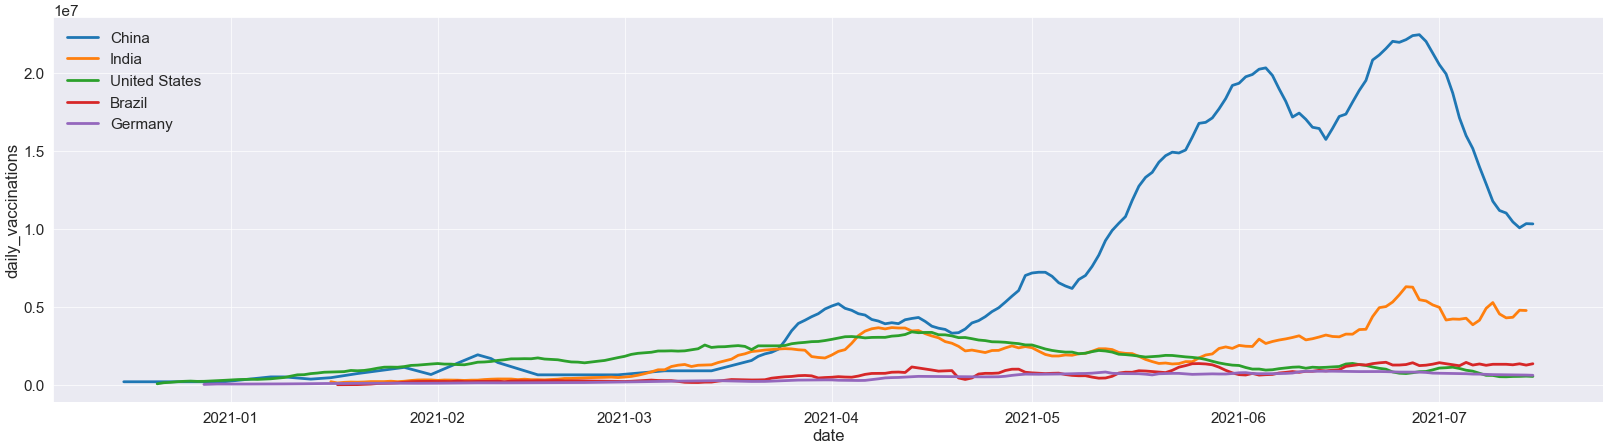

In [39]:
# Daily vaccination Trend of Top 5 Countries leading in Total Number of People Vaccinated
label = df.groupby(['country'])['people_vaccinated'].max().sort_values(ascending = False).head(5)
col = sns.color_palette("tab10")
sns.set(font_scale=2)
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=50, figsize=(40,10))
for i in range(5):
    Dai_Vac = df[df['country'] ==people_vac.index[i]]
    sns.lineplot(data =Dai_Vac, x='date', y='daily_vaccinations', linewidth=4,color = col[i],label =label.index[i],ax = ax  )
plt.show()    

<AxesSubplot:ylabel='people_vaccinated_per_hundred'>

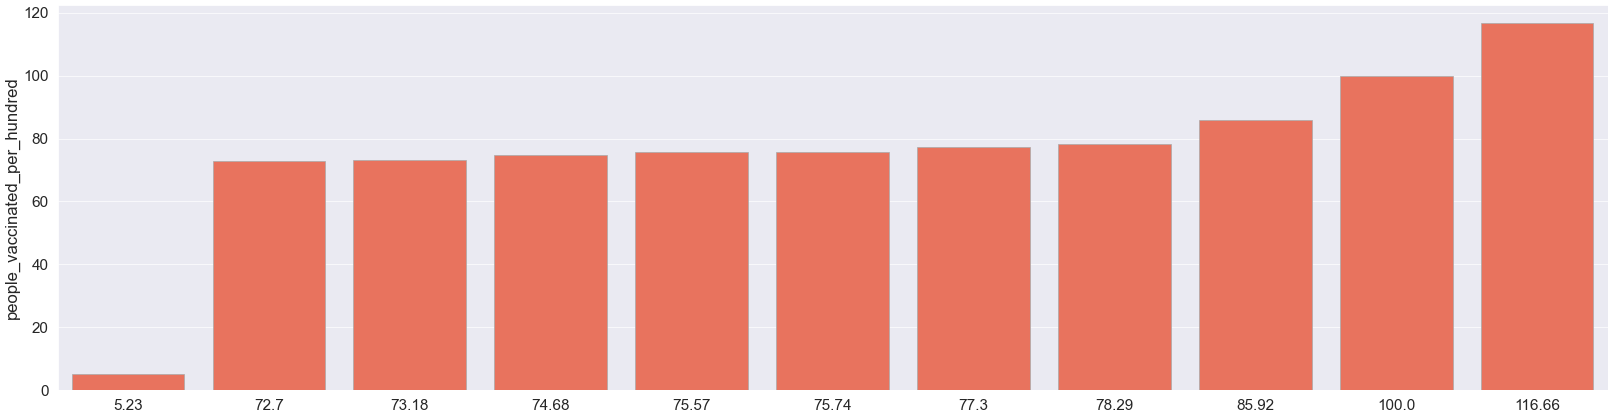

In [40]:
# Total number of people vaccinated per hundred #
# Iran people vaccinated per hundred
peovac_p_hu_iran = df.groupby(['country'])['people_vaccinated_per_hundred'].max()['Iran']
pd_iran = pd.Series(peovac_p_hu_iran, name='people_vaccinated_per_hundred',index =['Iran'])

# 10 country max  people vaccinated per hundred
peovac_p_hu = df.groupby(['country'])['people_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

#  Use pandas. concat() to merge two Series
df_join_iran_10count = pd.concat([peovac_p_hu,pd_iran ])
sns.set(font_scale=2)
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=50, figsize=(40,10))

sns.barplot(data = df_join_iran_10count,x=df_join_iran_10count.values, y=df_join_iran_10count.index, color='tomato',edgecolor='darkgrey')

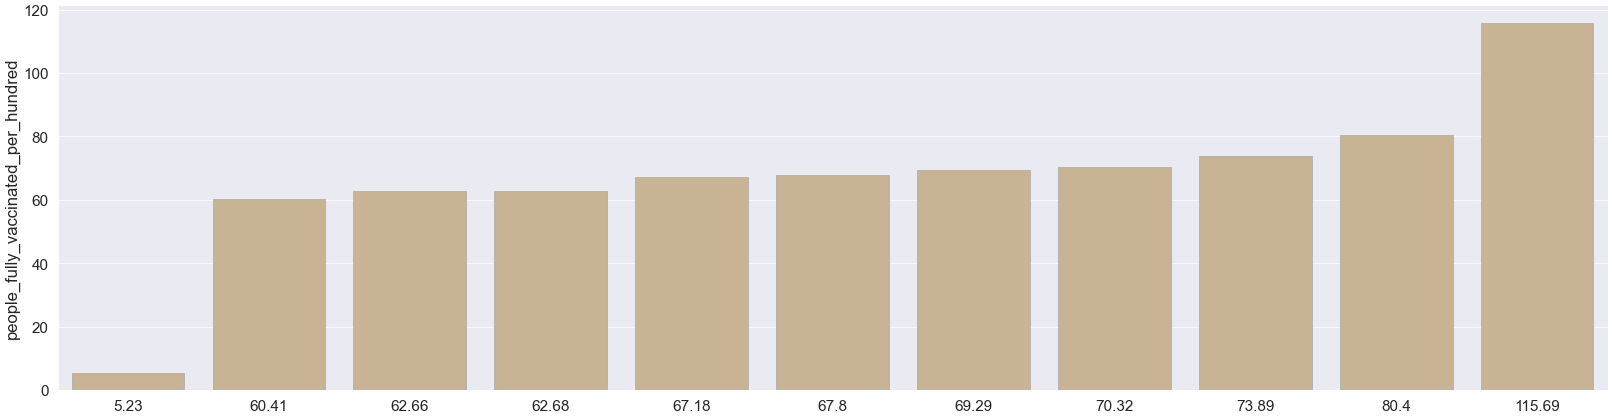

In [41]:
# Iran people  fully vaccinated per hundred
peovac_p_hu_iran_f = df.groupby(['country'])['people_fully_vaccinated_per_hundred'].max()['Iran']
pd_iran_f = pd.Series(peovac_p_hu_iran, name='people_fully_vaccinated_per_hundred',index =['Iran'])

# 10 country max  people vaccinated per hundred
peofulvac_p_hu = df.groupby(['country'])['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

#  Use pandas. concat() to merge two Series

df_join_iran_10count_ful = pd.concat([peofulvac_p_hu,pd_iran_f ])

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=50, figsize=(40,10))
sns.set(font_scale=2)
sns.barplot(data =df_join_iran_10count_ful ,x=df_join_iran_10count_ful.values, y=df_join_iran_10count_ful.index,color='tan',
            edgecolor='darkgrey',ax = ax)

plt.show()

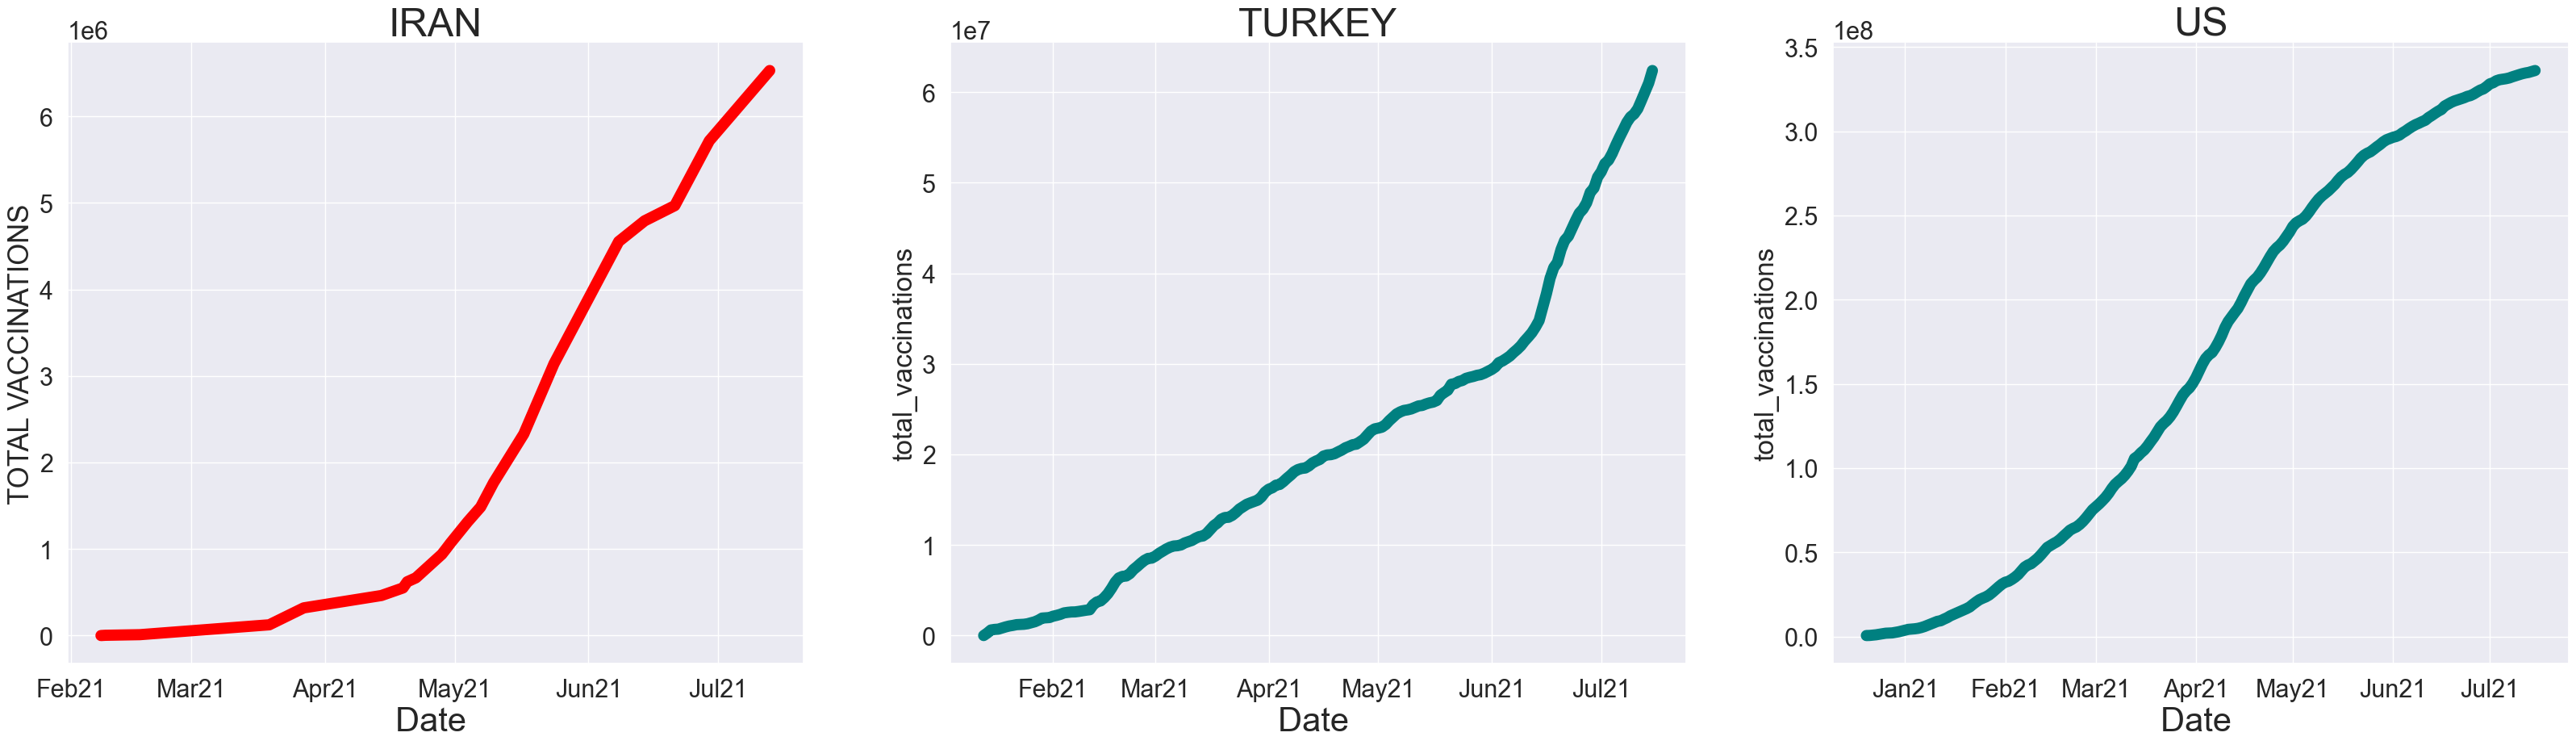

In [42]:
################### Studying Iran Vaccination against Turkey and US ###############
IranVacc = df[df['country'] == 'Iran']
TurkeyVacc =df[df['country'] == 'Turkey']
USVacc = df[df['country'] == 'United States']
fig, ax = plt.subplots(nrows=1, ncols=3, dpi=100, figsize=(40,10))

########################### total Vaccination ####################################

sns.lineplot(data =IranVacc, x='date', y='total_vaccinations',
             ax=ax[0], color = "red", linewidth=10)
sns.lineplot(data = TurkeyVacc, x='date', y='total_vaccinations',
             ax=ax[1], color = 'teal', linewidth=10)
sns.lineplot(data = USVacc, x='date', y='total_vaccinations',
             ax=ax[2], color = 'teal', linewidth=10)
ax[0].set_ylabel("TOTAL VACCINATIONS", fontsize = 25)
ax[0].set_xlabel("Date ",fontsize = 30)
ax[1].set_xlabel("Date ",fontsize = 30)
ax[2].set_xlabel("Date ",fontsize = 30)
ax[0].set_title("IRAN", fontsize=35)
ax[1].set_title("TURKEY", fontsize=35)
ax[2].set_title("US", fontsize=35)
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].xaxis.set_major_formatter(DateFormatter('%b%y'))

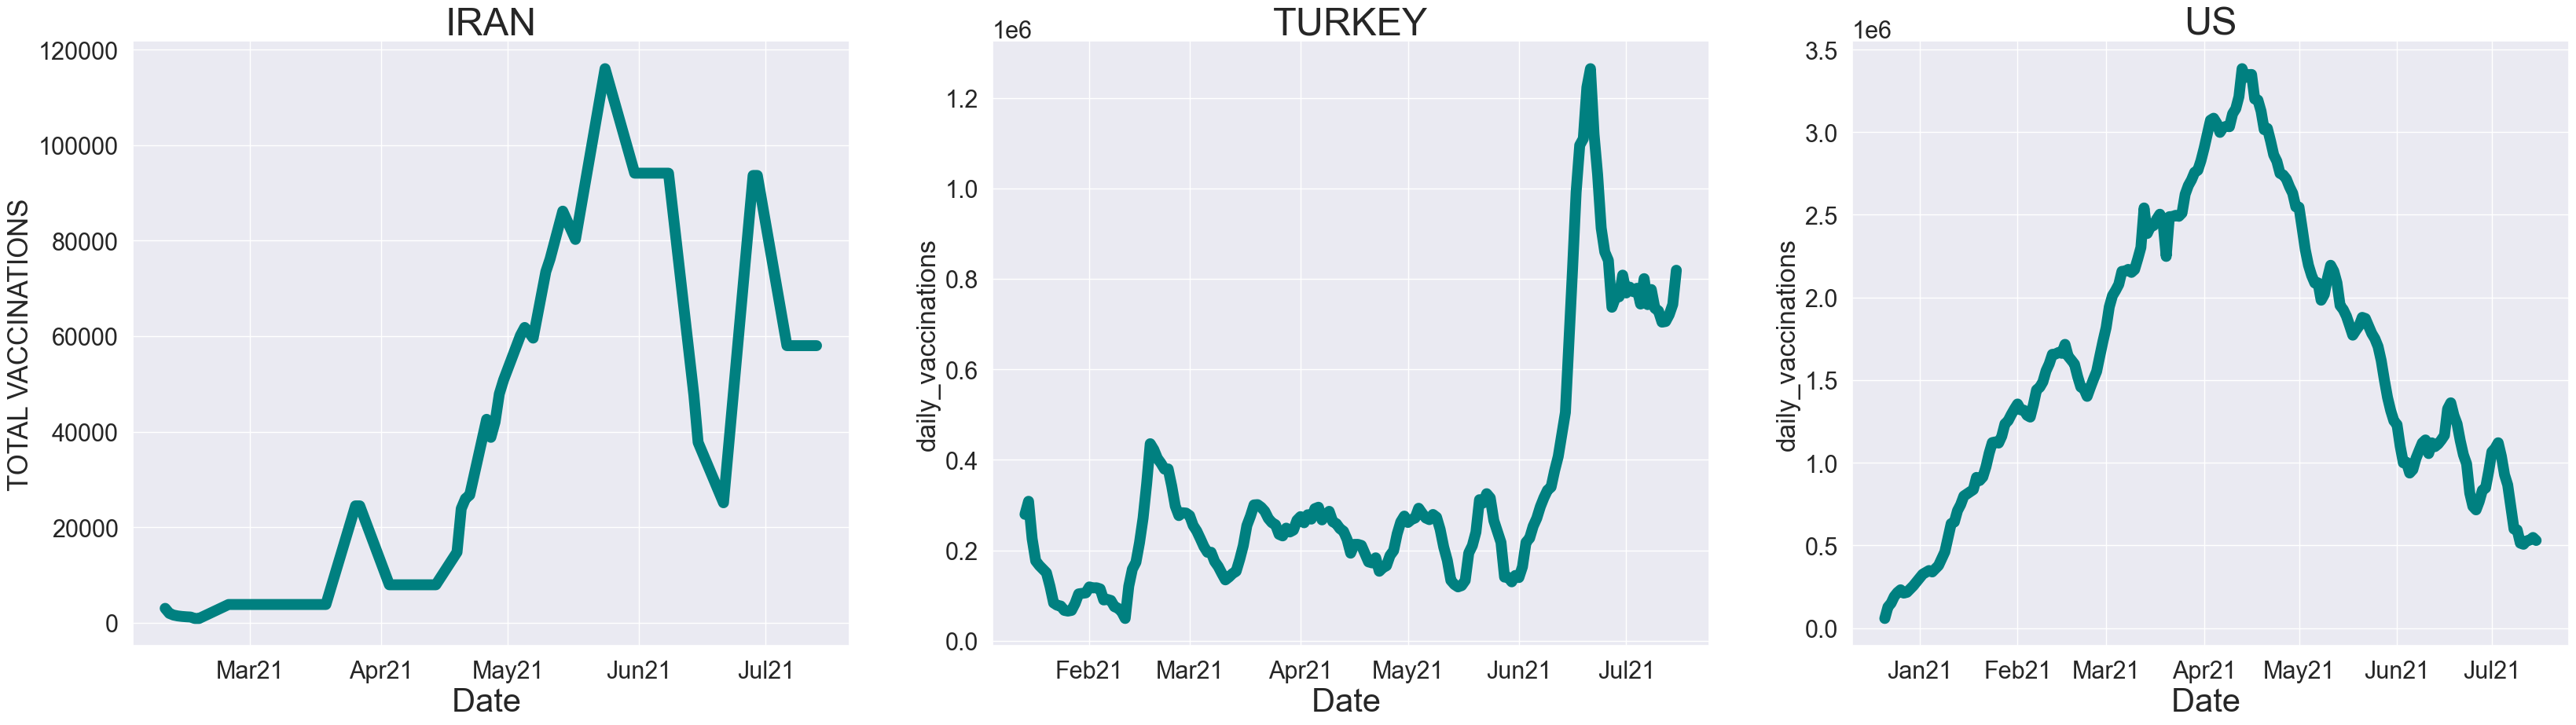

In [43]:
################### Studying Iran Vaccination against Turkey and US ###############
IranVacc = df[df['country'] == 'Iran']
TurkeyVacc =df[df['country'] == 'Turkey']
USVacc = df[df['country'] == 'United States']
fig, ax = plt.subplots(nrows=1, ncols=3, dpi=100, figsize=(40,10))

########################### Daily Vaccination ####################################

sns.lineplot(data =IranVacc, x='date', y='daily_vaccinations', ax=ax[0], color = 'teal', linewidth=10)
sns.lineplot(data = TurkeyVacc, x='date', y='daily_vaccinations',ax=ax[1], color = 'teal', linewidth=10)
sns.lineplot(data = USVacc, x='date', y='daily_vaccinations',ax=ax[2], color = 'teal', linewidth=10)
ax[0].set_ylabel("TOTAL VACCINATIONS", fontsize = 25)
ax[0].set_xlabel("Date ",fontsize = 30)
ax[1].set_xlabel("Date ",fontsize = 30)
ax[2].set_xlabel("Date ",fontsize = 30)
ax[0].set_title("IRAN", fontsize=35)
ax[1].set_title("TURKEY", fontsize=35)
ax[2].set_title("US", fontsize=35)
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].xaxis.set_major_formatter(DateFormatter('%b%y'))

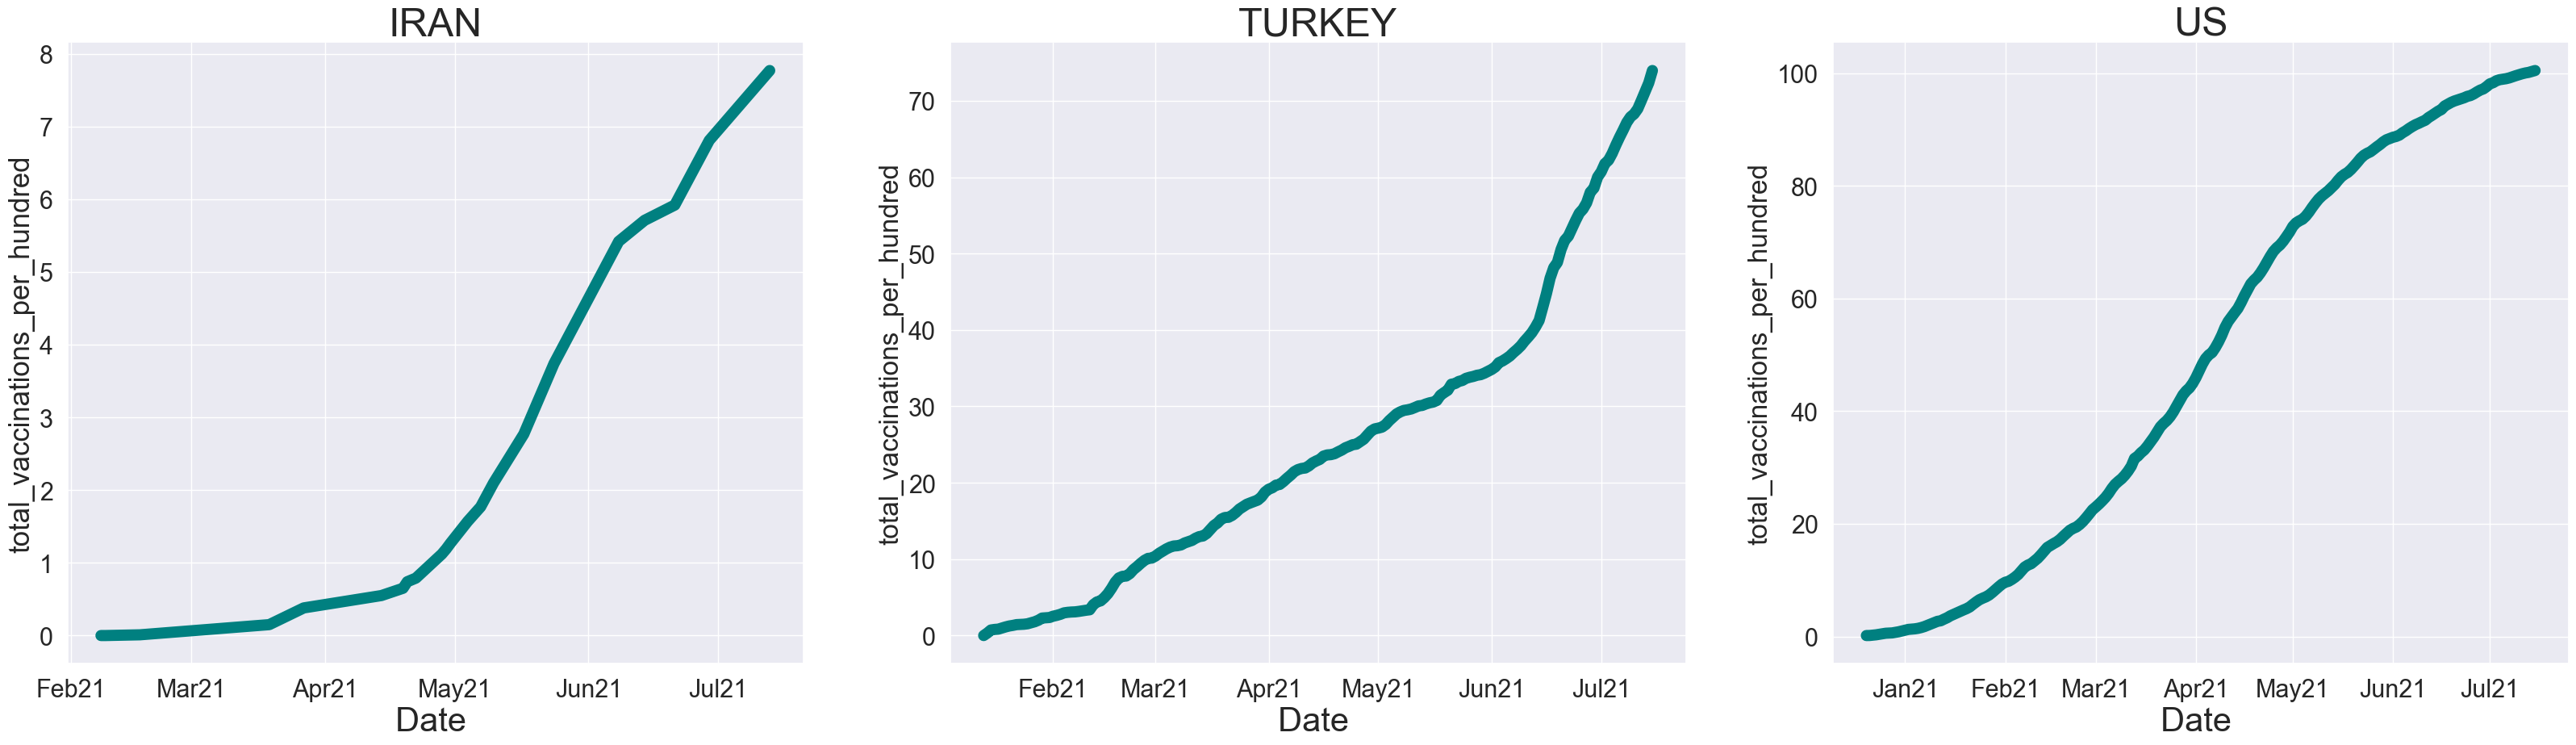

In [44]:
################### Studying Iran Vaccination against Turkey and US ###############
IranVacc = df[df['country'] == 'Iran']
TurkeyVacc =df[df['country'] == 'Turkey']
USVacc = df[df['country'] == 'United States']
fig, ax = plt.subplots(nrows=1, ncols=3, dpi=100, figsize=(40,10))

# total_vaccinations_per_hundred 

sns.lineplot(data =IranVacc, x='date', y='total_vaccinations_per_hundred', ax=ax[0], color = 'teal', linewidth=10)
sns.lineplot(data = TurkeyVacc, x='date', y='total_vaccinations_per_hundred',ax=ax[1], color = 'teal', linewidth=10)
sns.lineplot(data = USVacc, x='date', y='total_vaccinations_per_hundred',ax=ax[2], color = 'teal', linewidth=10)
ax[0].set_ylabel("total_vaccinations_per_hundred", fontsize = 25)
ax[0].set_xlabel("Date ",fontsize = 30)
ax[1].set_xlabel("Date ",fontsize = 30)
ax[2].set_xlabel("Date ",fontsize = 30)
ax[0].set_title("IRAN", fontsize=35)
ax[1].set_title("TURKEY", fontsize=35)
ax[2].set_title("US", fontsize=35)
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[0].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter('%b%y'))
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].xaxis.set_major_formatter(DateFormatter('%b%y'))

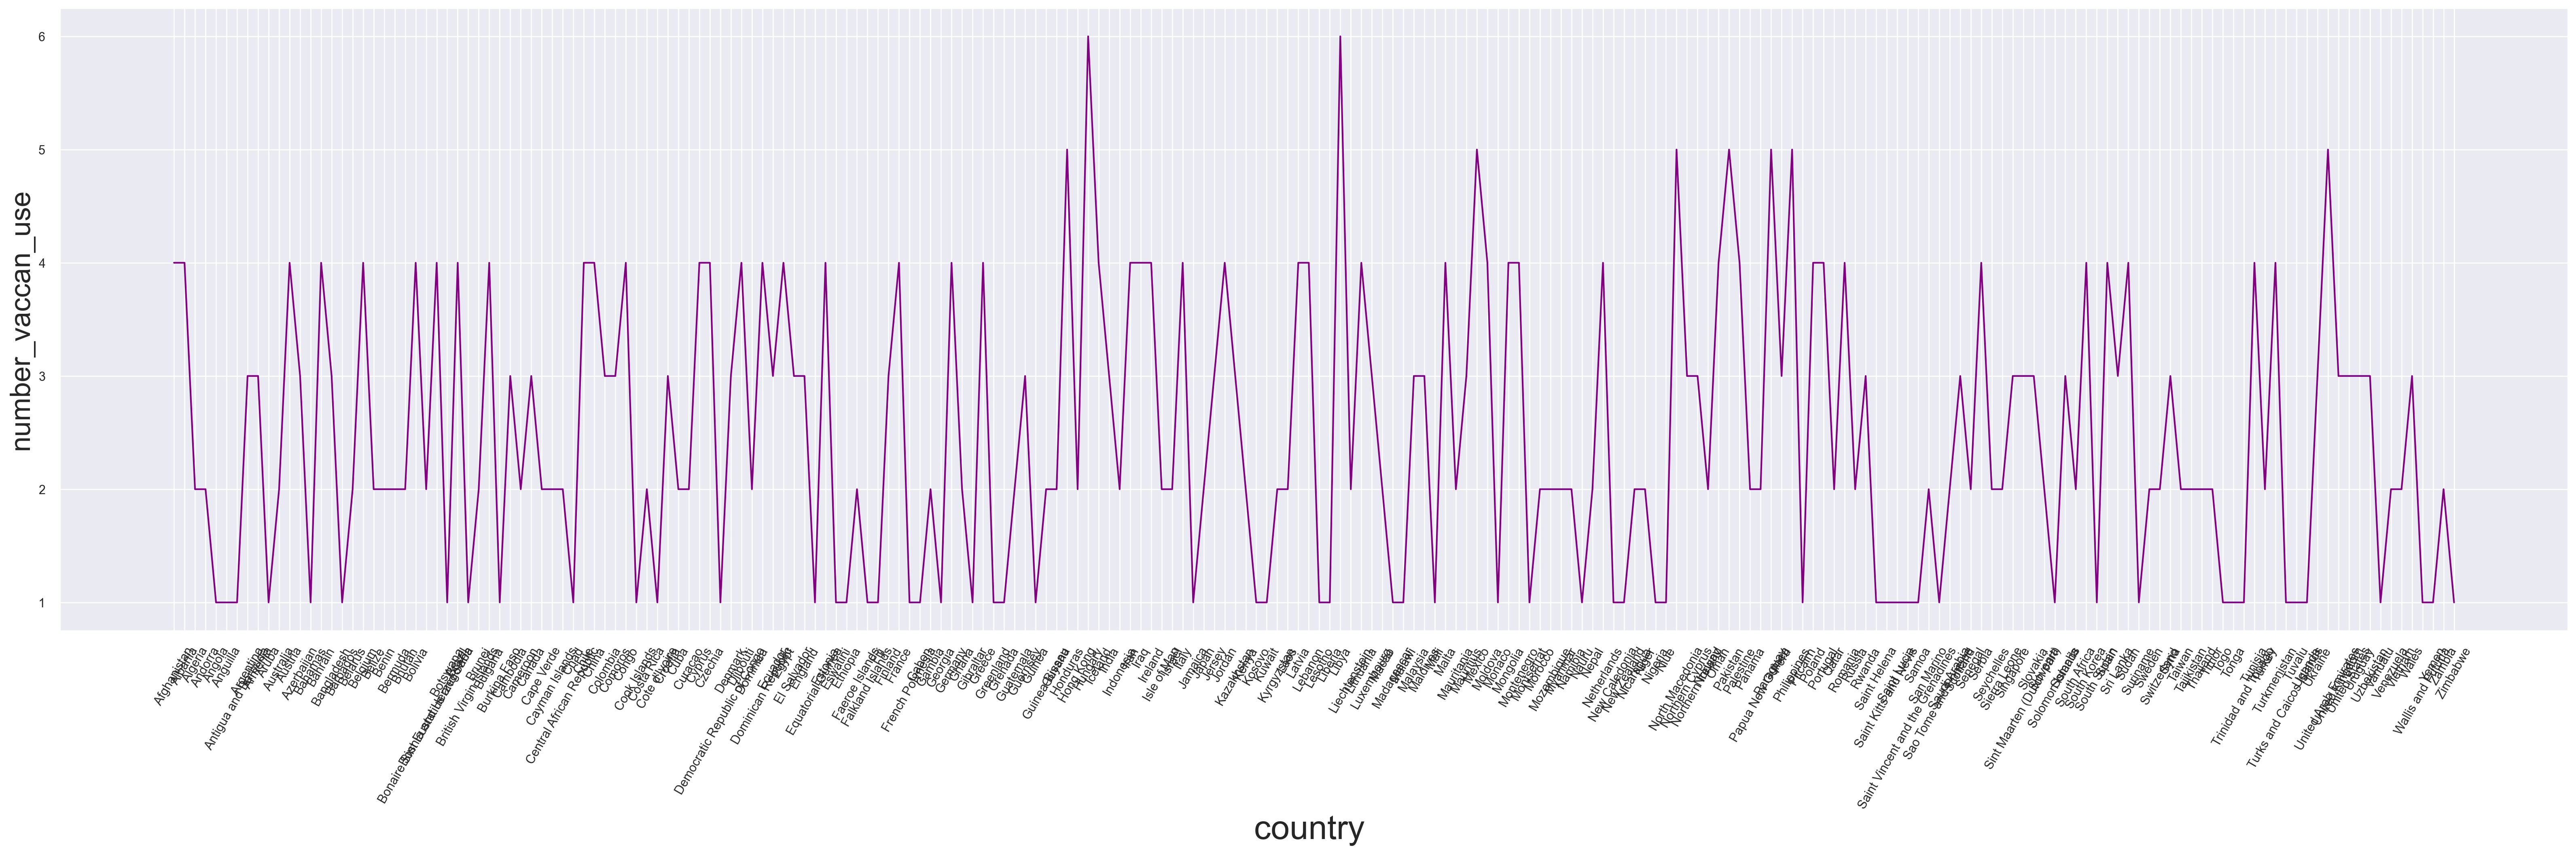

In [45]:
# We found that each country used several types of vaccines
def convert(k):
    count_vac_use = k
    lis= count_vac_use.tolist()
    i=0
    while i<len(lis):
        my_string = lis[0] 
        my_list = my_string.split(",")
        return len(my_list)
lst1=[]    
for i in range(len(df.country.unique().tolist())):
    m = df.country.unique().tolist()[i]
    n = df[df['country'] == str(m)]['vaccines'].unique()
    lst2 = [m,convert(n)]
    lst1.append(lst2)
type_count_vacc = pd.DataFrame(lst1,columns =['country','number_vaccan_use'])
sns.set()
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=200, figsize=(40,10))
    
sns.lineplot(data =type_count_vacc, x='country', y='number_vaccan_use',  color = 'purple',ax=ax)    
ax.set_ylabel("number_vaccan_use", fontsize = 25)
ax.set_xlabel("country ",fontsize = 30)
for label in ax.xaxis.get_ticklabels():
            label.set_rotation(60)


<AxesSubplot:xlabel='numberv_type_vacc', ylabel='number_country_use'>

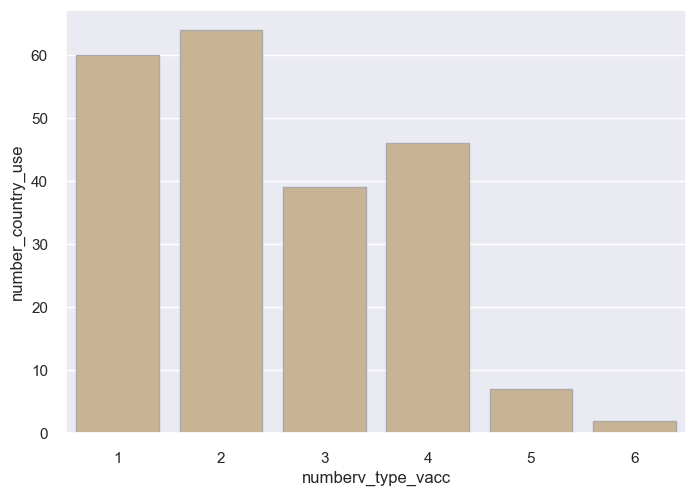

In [46]:
def Count_Type_Vac(t):
    lst_t =[]
    for j in range(len(lst1)):
        if lst1[j][1]== t:
            lst_x = lst1[j]
            lst_t.append(lst_x)
    return len(lst_t)
lis_Count_Type_Vac = []
for i in range(1,7):
    lis_Count_Type_Vac.append([i,Count_Type_Vac(i)])

count_Type = pd.DataFrame(lis_Count_Type_Vac,columns =['numberv_type_vacc','number_country_use'])
count_Type
sns.barplot(data = count_Type,x ='numberv_type_vacc' ,y = 'number_country_use', color='tan', edgecolor='darkgrey')

## Prepare Data for Machine learning

#### 1) Delete the Rows with Nan Data 

In [47]:
df_dropna = df.copy()

In [48]:
# summarize the shape of the raw data
print("Before:",df_dropna.shape)

# drop rows with missing values
df_dropna.dropna(inplace=True)

# count the number of NaN values in each column
print(df_dropna.isnull().sum())

# summarize the shape of the data with missing rows removed
print("After:",df_dropna.shape)

Before: (31240, 19)
country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
Day_num                                0
Day                                    0
Month                                  0
Year                                   0
dtype: int64
After: (11771, 19)


#### 2) Use The Mean of Columns for Nan Data 

In [49]:
df_fillna = df.copy()

In [50]:
df_fillna

country iso_code       date  total_vaccinations  people_vaccinated  \
0      Afghanistan      AFG 2021-02-22                 0.0                0.0   
1      Afghanistan      AFG 2021-02-23                 NaN                NaN   
2      Afghanistan      AFG 2021-02-24                 NaN                NaN   
3      Afghanistan      AFG 2021-02-25                 NaN                NaN   
4      Afghanistan      AFG 2021-02-26                 NaN                NaN   
...            ...      ...        ...                 ...                ...   
31235     Zimbabwe      ZWE 2021-07-11           1491397.0           895980.0   
31236     Zimbabwe      ZWE 2021-07-12           1531868.0           926312.0   
31237     Zimbabwe      ZWE 2021-07-13           1575539.0           955656.0   
31238     Zimbabwe      ZWE 2021-07-14           1613640.0           988746.0   
31239     Zimbabwe      ZWE 2021-07-15           1666862.0          1036252.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                          NaN                     NaN                 NaN   
1                          NaN                     NaN              1367.0   
2                          NaN                     NaN              1367.0   
3                          NaN                     NaN              1367.0   
4                          NaN                     NaN              1367.0   
...                        ...                     ...                 ...   
31235                 595417.0                     NaN             18598.0   
31236                 605556.0                 40471.0             23205.0   
31237                 619883.0                 43671.0             27567.0   
31238                 624894.0                 38101.0             30698.0   
31239                 630610.0                 53222.0             33326.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                0.00                           0.00   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
31235                           10.03                           6.03   
31236                           10.31                           6.23   
31237                           10.60                           6.43   
31238                           10.86                           6.65   
31239                           11.21                           6.97   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                      NaN                             NaN   
1                                      NaN                            35.0   
2                                      NaN                            35.0   
3                                      NaN                            35.0   
4                                      NaN                            35.0   
...                                    ...                             ...   
31235                                 4.01                          1251.0   
31236                                 4.07                          1561.0   
31237                                 4.17                          1855.0   
31238                                 4.20                          2065.0   
31239                                 4.24                          2242.0   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

In [51]:
# fill missing values with mean column values
df_fillna.fillna(df_fillna.mean(), inplace=True)

# count the number of NaN values in each column
print(df_fillna.isnull().sum())

df_fillna

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
Day_num                                0
Day                                    0
Month                                  0
Year                                   0
dtype: int64


country iso_code       date  total_vaccinations  people_vaccinated  \
0      Afghanistan      AFG 2021-02-22        0.000000e+00       0.000000e+00   
1      Afghanistan      AFG 2021-02-23        1.200444e+07       5.704551e+06   
2      Afghanistan      AFG 2021-02-24        1.200444e+07       5.704551e+06   
3      Afghanistan      AFG 2021-02-25        1.200444e+07       5.704551e+06   
4      Afghanistan      AFG 2021-02-26        1.200444e+07       5.704551e+06   
...            ...      ...        ...                 ...                ...   
31235     Zimbabwe      ZWE 2021-07-11        1.491397e+06       8.959800e+05   
31236     Zimbabwe      ZWE 2021-07-12        1.531868e+06       9.263120e+05   
31237     Zimbabwe      ZWE 2021-07-13        1.575539e+06       9.556560e+05   
31238     Zimbabwe      ZWE 2021-07-14        1.613640e+06       9.887460e+05   
31239     Zimbabwe      ZWE 2021-07-15        1.666862e+06       1.036252e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 3.293973e+06           227366.073989       114971.789486   
1                 3.293973e+06           227366.073989         1367.000000   
2                 3.293973e+06           227366.073989         1367.000000   
3                 3.293973e+06           227366.073989         1367.000000   
4                 3.293973e+06           227366.073989         1367.000000   
...                        ...                     ...                 ...   
31235             5.954170e+05           227366.073989        18598.000000   
31236             6.055560e+05            40471.000000        23205.000000   
31237             6.198830e+05            43671.000000        27567.000000   
31238             6.248940e+05            38101.000000        30698.000000   
31239             6.306100e+05            53222.000000        33326.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           29.283554                      19.181574   
2                           29.283554                      19.181574   
3                           29.283554                      19.181574   
4                           29.283554                      19.181574   
...                               ...                            ...   
31235                       10.030000                       6.030000   
31236                       10.310000                       6.230000   
31237                       10.600000                       6.430000   
31238                       10.860000                       6.650000   
31239                       11.210000                       6.970000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                12.340698                     3426.365969   
1                                12.340698                       35.000000   
2                                12.340698                       35.000000   
3                                12.340698                       35.000000   
4                                12.340698                       35.000000   
...                                    ...                             ...   
31235                             4.010000                     1251.000000   
31236                             4.070000                     1561.000000   
31237                             4.170000                     1855.000000   
31238                             4.200000                     2065.000000   
31239                             4.240000                     2242.000000   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

## Train your model

#### For This Part I Want to Use Some Algorithms and Comparison with Pycaret and Then I Use Two of The Best Models with 2 Method That We Fill Nan Data's

### 1.1) Linear Regression(LR) with df_dropna

<AxesSubplot:>

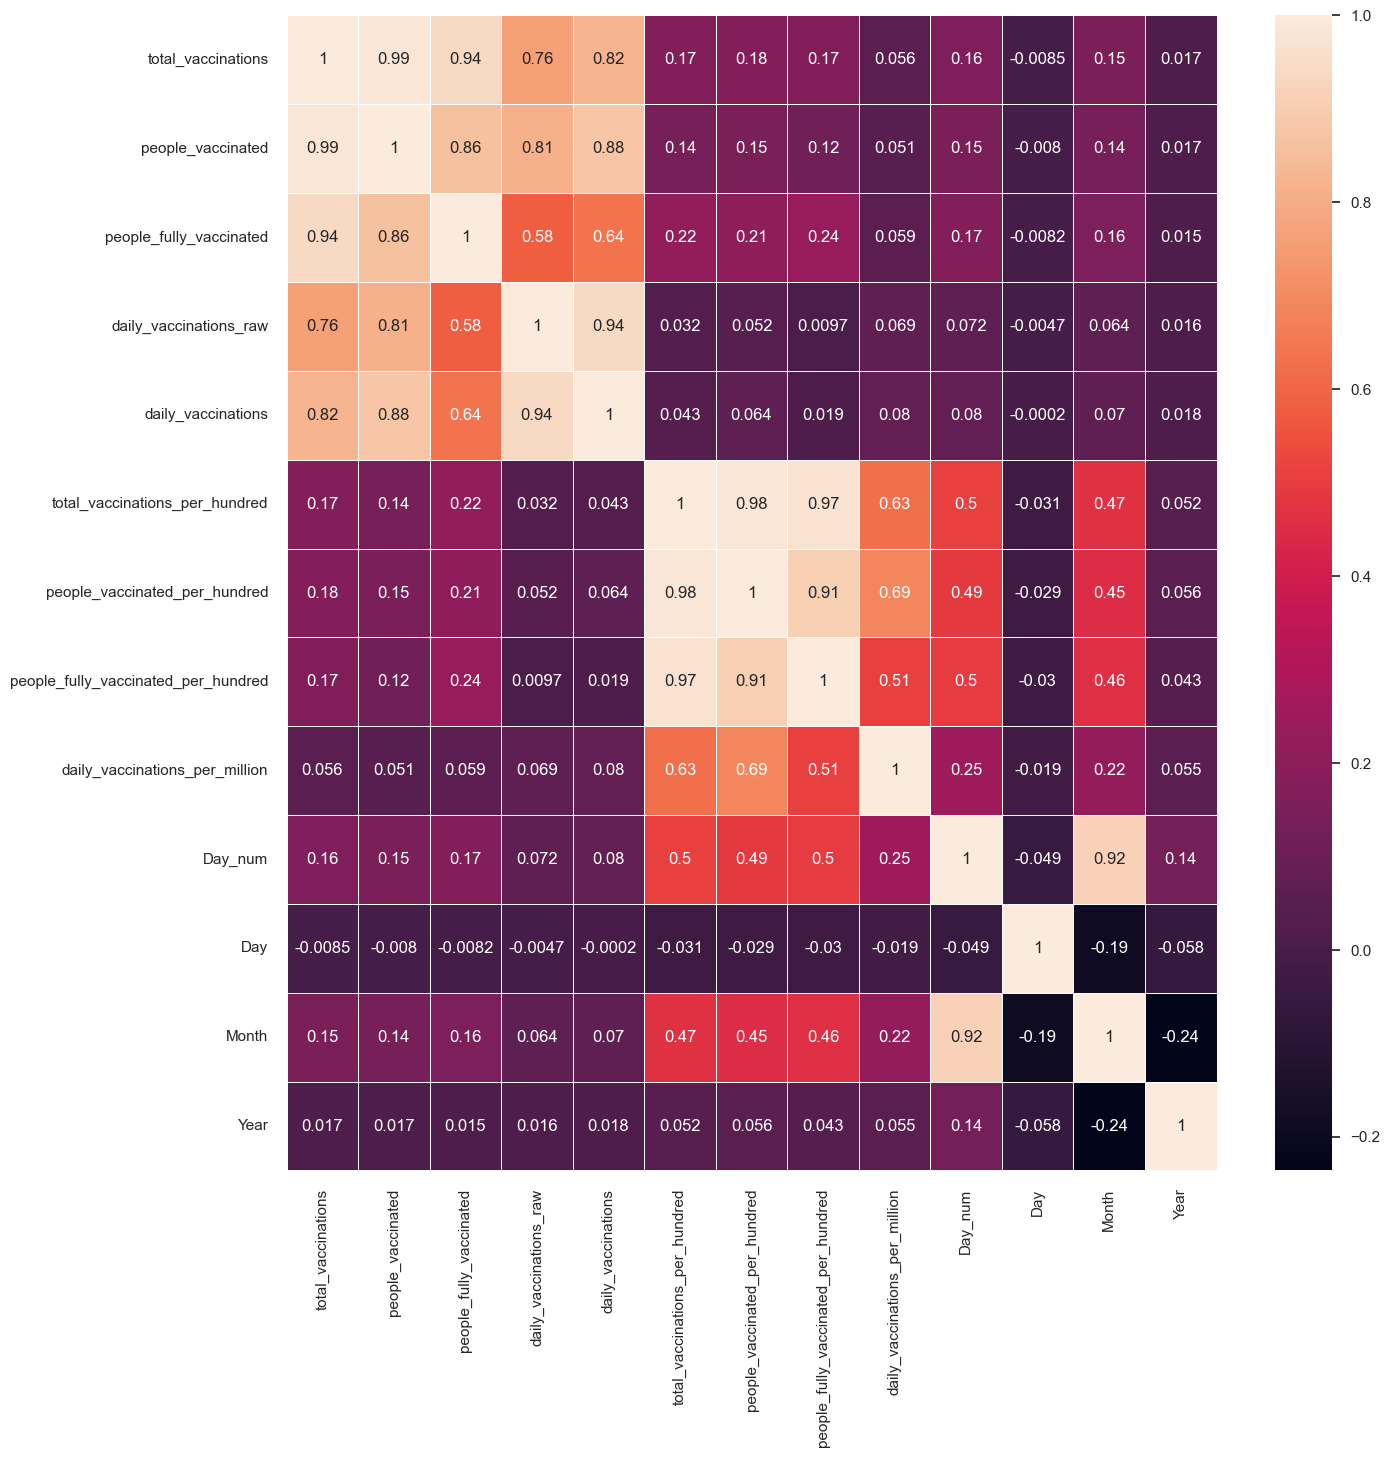

In [52]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
my_correlation = df_dropna.corr()
sns.heatmap(my_correlation, annot=True, linewidths=0.5, ax=ax)

In [53]:
X_LR_1 = df_dropna[['people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','daily_vaccinations']]
Y_LR_1 = df_dropna[['total_vaccinations']]

In [54]:
X_LR_1

people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
94              479574.0                 113739.0                  2859.0   
101             481800.0                 148505.0                  4015.0   
182               2438.0                    611.0                  1348.0   
264             440921.0                 181586.0                  9548.0   
265             444755.0                 187921.0                 10169.0   
...                  ...                      ...                     ...   
31233           875182.0                 588883.0                 30487.0   
31236           926312.0                 605556.0                 40471.0   
31237           955656.0                 619883.0                 43671.0   
31238           988746.0                 624894.0                 38101.0   
31239          1036252.0                 630610.0                 53222.0   

       daily_vaccinations  
94                 6487.0  
101                5285.0  
182                 254.0  
264               12160.0  
265               10870.0  
...                   ...  
31233             15907.0  
31236             23205.0  
31237             27567.0  
31238             30698.0  
31239             33326.0  

[11771 rows x 4 columns]

In [55]:
Y_LR_1

total_vaccinations
94               593313.0
101              630305.0
182                3049.0
264              622507.0
265              632676.0
...                   ...
31233           1464065.0
31236           1531868.0
31237           1575539.0
31238           1613640.0
31239           1666862.0

[11771 rows x 1 columns]

In [56]:
X_train_LR_1, X_test_LR_1 , y_train_LR_1 , y_test_LR_1 = train_test_split(X_LR_1,Y_LR_1,test_size=0.25,random_state=11)

In [57]:
regressor_LR_1 = LinearRegression()
regressor_LR_1.fit(X_train_LR_1, y_train_LR_1)

LinearRegression()

In [58]:
predictions_LR_1 = regressor_LR_1.predict(X_test_LR_1)

In [59]:
y_test_LR_1

total_vaccinations
6681            3016266.0
26797           2167241.0
26551            803155.0
18701             20373.0
29679           8369438.0
...                   ...
21241           1226734.0
1395              80258.0
26136           1254921.0
101              630305.0
20965            499206.0

[2943 rows x 1 columns]

In [60]:
predictions_LR_1

array([[2104846.27480369],
       [2167933.65090183],
       [ 849238.71914817],
       ...,
       [1264834.67083545],
       [ 660820.15081541],
       [ 539233.28533732]])

<AxesSubplot:ylabel='Count'>

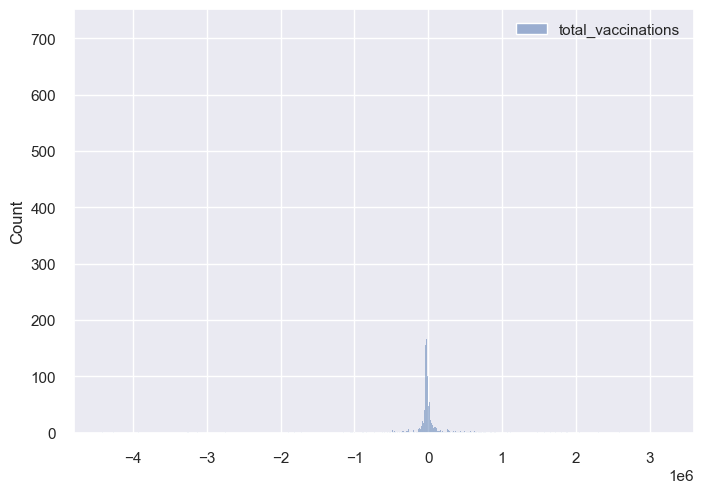

In [61]:
sns.histplot(y_test_LR_1-predictions_LR_1)

In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_LR_1, predictions_LR_1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_LR_1, predictions_LR_1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_LR_1, predictions_LR_1)))

Mean Absolute Error: 124070.43849950079
Mean Squared Error: 125762003471.12419
Root Mean Squared Error: 354629.3888993469


In [63]:
regressor_LR_1.score(X_test_LR_1, y_test_LR_1)

0.9998969258407212

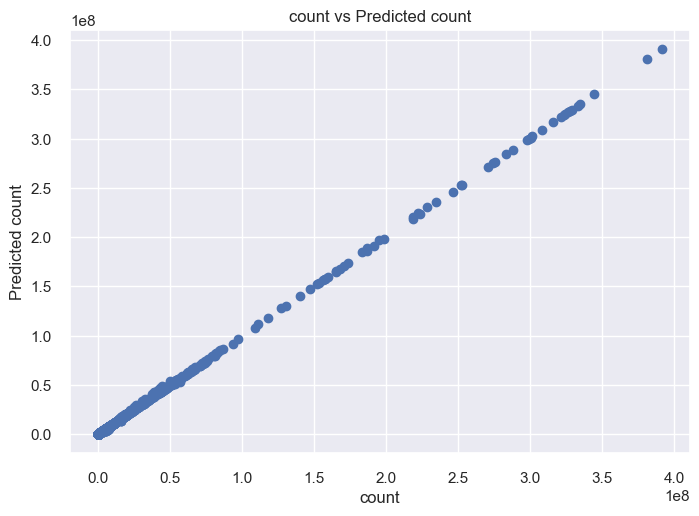

In [64]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test_LR_1, predictions_LR_1)
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("count vs Predicted count")
plt.show()

---------------------------

### 1.2) Linear Regression(LR) with df_fillna

<AxesSubplot:>

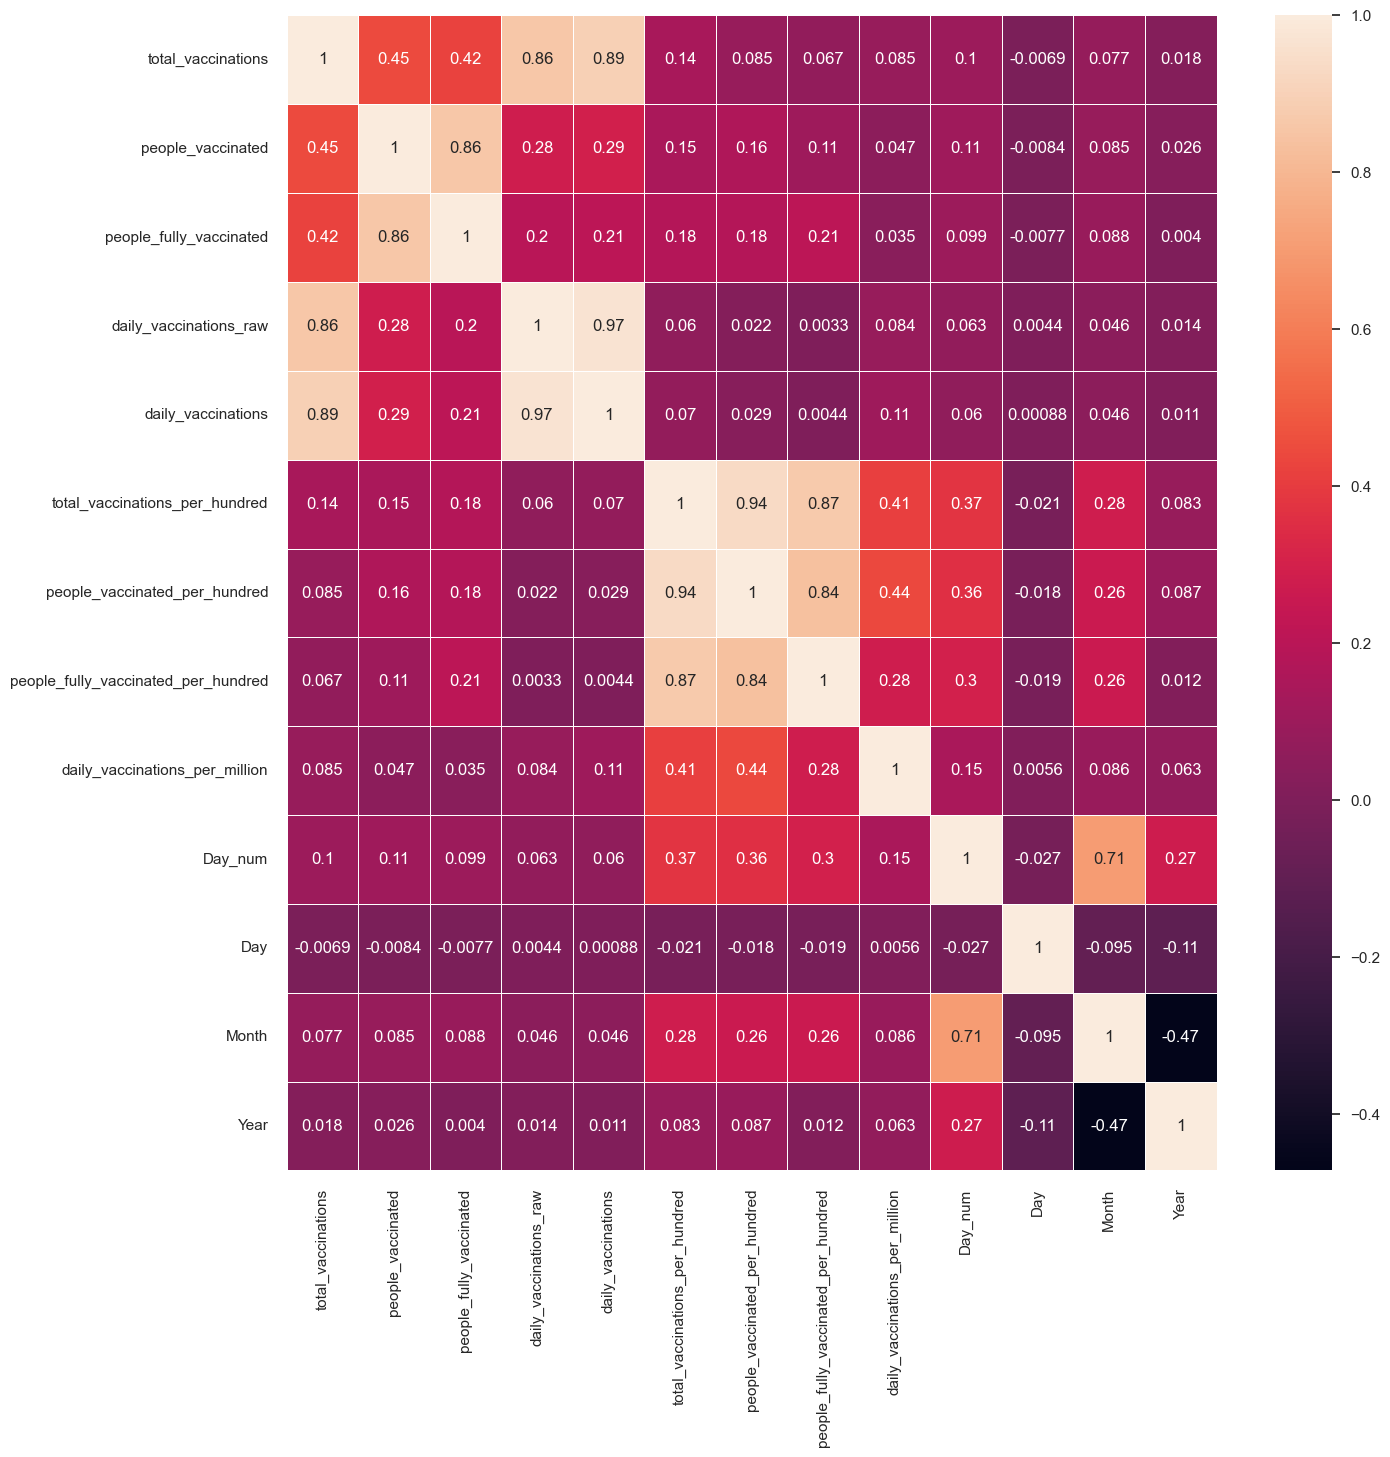

In [65]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
my_correlation = df_fillna.corr()
sns.heatmap(my_correlation, annot=True, linewidths=0.5, ax=ax)

In [66]:
X_LR_2 = df_fillna[['people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','daily_vaccinations']]
Y_LR_2 = df_fillna[['total_vaccinations']]

In [67]:
X_LR_2

people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0           0.000000e+00             3.293973e+06           227366.073989   
1           5.704551e+06             3.293973e+06           227366.073989   
2           5.704551e+06             3.293973e+06           227366.073989   
3           5.704551e+06             3.293973e+06           227366.073989   
4           5.704551e+06             3.293973e+06           227366.073989   
...                  ...                      ...                     ...   
31235       8.959800e+05             5.954170e+05           227366.073989   
31236       9.263120e+05             6.055560e+05            40471.000000   
31237       9.556560e+05             6.198830e+05            43671.000000   
31238       9.887460e+05             6.248940e+05            38101.000000   
31239       1.036252e+06             6.306100e+05            53222.000000   

       daily_vaccinations  
0           114971.789486  
1             1367.000000  
2             1367.000000  
3             1367.000000  
4             1367.000000  
...                   ...  
31235        18598.000000  
31236        23205.000000  
31237        27567.000000  
31238        30698.000000  
31239        33326.000000  

[31240 rows x 4 columns]

In [68]:
Y_LR_2

total_vaccinations
0            0.000000e+00
1            1.200444e+07
2            1.200444e+07
3            1.200444e+07
4            1.200444e+07
...                   ...
31235        1.491397e+06
31236        1.531868e+06
31237        1.575539e+06
31238        1.613640e+06
31239        1.666862e+06

[31240 rows x 1 columns]

In [69]:
X_train_LR_2, X_test_LR_2 , y_train_LR_2 , y_test_LR_2 = train_test_split(X_LR_2,Y_LR_2,test_size=0.25,random_state=12)

In [70]:
regressor_LR_2 = LinearRegression()
regressor_LR_2.fit(X_train_LR_2, y_train_LR_2)

LinearRegression()

In [71]:
predictions_LR_2 = regressor_LR_2.predict(X_test_LR_2)

In [72]:
y_test_LR_2

total_vaccinations
22486        1.200444e+07
26131        1.190566e+06
9887         1.200444e+07
23429        1.177930e+07
8876         7.517910e+05
...                   ...
26103        7.346990e+05
24524        1.200444e+07
19822        5.715460e+05
30845        1.200444e+07
24925        6.820500e+04

[7810 rows x 1 columns]

In [73]:
predictions_LR_2

array([[17785059.50232866],
       [ 3359420.14822314],
       [ 5984379.3647307 ],
       ...,
       [ 2832316.8943097 ],
       [ 5971722.96557232],
       [ 7381528.25020103]])

<AxesSubplot:ylabel='Count'>

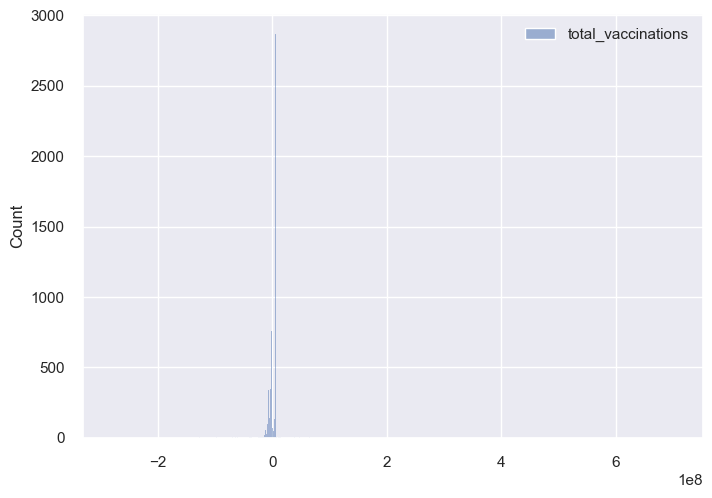

In [74]:
sns.histplot(y_test_LR_2-predictions_LR_2)

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_LR_2, predictions_LR_2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_LR_2, predictions_LR_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_LR_2, predictions_LR_2)))

Mean Absolute Error: 5536486.473499343
Mean Squared Error: 202150320710971.12
Root Mean Squared Error: 14217957.684244636


In [76]:
regressor_LR_2.score(X_test_LR_2, y_test_LR_2)

0.8524121930553282

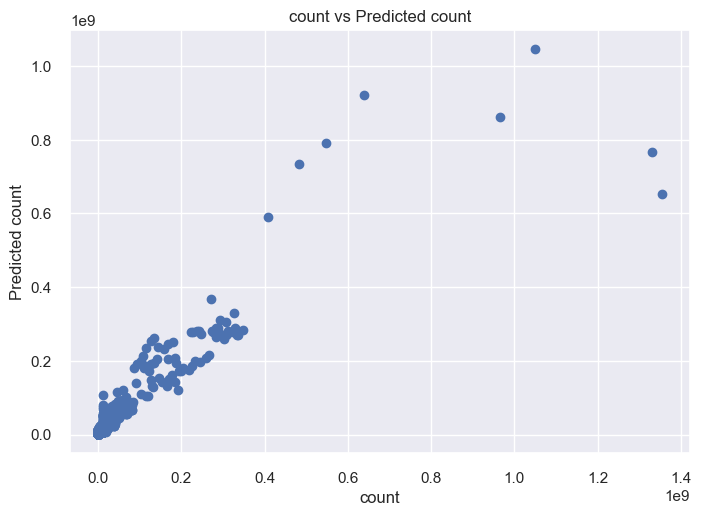

In [77]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test_LR_2, predictions_LR_2)
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("count vs Predicted count")
plt.show()

---------------

### 2.1) Multiple Linear Regression (MLR) with df_dropna

In [78]:
# Spliting target variable and independent variables
X_MLR_1 = df_dropna.drop(['country','iso_code','date','vaccines','source_name','source_website'], axis = 1)
y_MLR_1 = df_dropna['total_vaccinations']

In [79]:
# Splitting to training and testing data

X_train_MLR_1, X_test_MLR_1, y_train_MLR_1, y_test_MLR_1 = train_test_split(X_MLR_1,y_MLR_1, test_size = 0.25, random_state = 21)

In [80]:
# Create a Linear regressor
mlr_1 = LinearRegression()

# Train the model using the training sets 
mlr_1.fit(X_train_MLR_1, y_train_MLR_1)

LinearRegression()

In [81]:
mlr_1.intercept_

2.5663524866104126e-05

In [82]:
mlr_1.coef_

array([ 1.00000000e+00,  4.90227107e-16,  3.37931590e-16,  3.41837268e-16,
       -1.51561495e-15,  1.09321206e-11, -1.51128981e-11, -8.00201039e-12,
        1.36273587e-14,  3.55918401e-11, -3.72063271e-11, -1.05932736e-09,
       -1.26962948e-08])

In [83]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train_MLR_1.columns,mlr_1.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

Attribute Coefficients
0                    total_vaccinations          1.0
1                     people_vaccinated          0.0
2               people_fully_vaccinated          0.0
3                daily_vaccinations_raw          0.0
4                    daily_vaccinations         -0.0
5        total_vaccinations_per_hundred          0.0
6         people_vaccinated_per_hundred         -0.0
7   people_fully_vaccinated_per_hundred         -0.0
8        daily_vaccinations_per_million          0.0
9                               Day_num          0.0
10                                  Day         -0.0
11                                Month         -0.0
12                                 Year         -0.0

In [84]:
# Model prediction on train data
y_pred_t_1 = mlr_1.predict(X_train_MLR_1)
y_pred_T_1 = mlr_1.predict(X_test_MLR_1)

In [85]:
# Model Train Evaluation
print('R^2(train):',metrics.r2_score(y_train_MLR_1, y_pred_t_1))
print('MAE(train):',metrics.mean_absolute_error(y_train_MLR_1, y_pred_t_1))
print('MSE(train):',metrics.mean_squared_error(y_train_MLR_1, y_pred_t_1))
print('RMSE(train):',np.sqrt(metrics.mean_squared_error(y_train_MLR_1, y_pred_t_1)))

R^2(train): 1.0
MAE(train): 5.172885642967937e-09
MSE(train): 1.0729589141940211e-16
RMSE(train): 1.035837301024645e-08


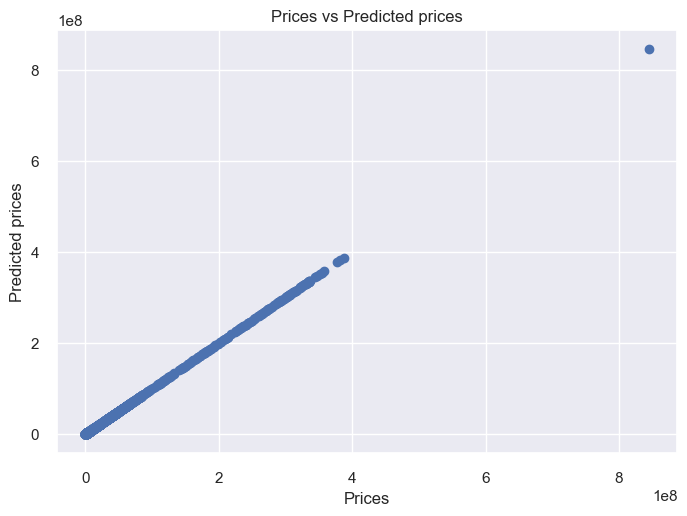

In [86]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train_MLR_1, y_pred_t_1)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

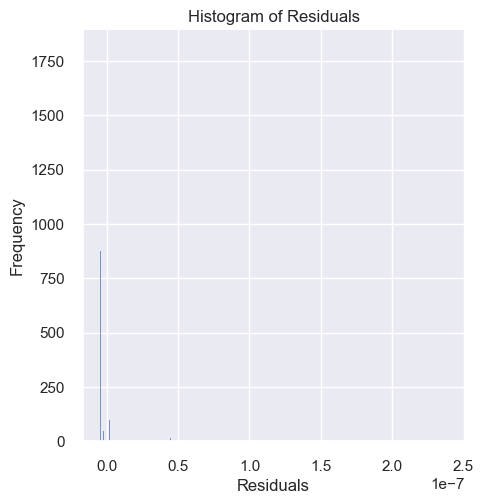

In [87]:
sns.displot(y_train_MLR_1-y_pred_t_1)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [88]:
# Model Test Evaluation
print('R^2(test):',metrics.r2_score(y_test_MLR_1, y_pred_T_1))
print('MAE(test):',metrics.mean_absolute_error(y_test_MLR_1, y_pred_T_1))
print('MSE(test):',metrics.mean_squared_error(y_test_MLR_1, y_pred_T_1))
print('RMSE(test):',np.sqrt(metrics.mean_squared_error(y_test_MLR_1, y_pred_T_1)))

R^2(test): 1.0
MAE(test): 5.200878120740156e-09
MSE(test): 1.0690266497307677e-16
RMSE(test): 1.0339374496219622e-08


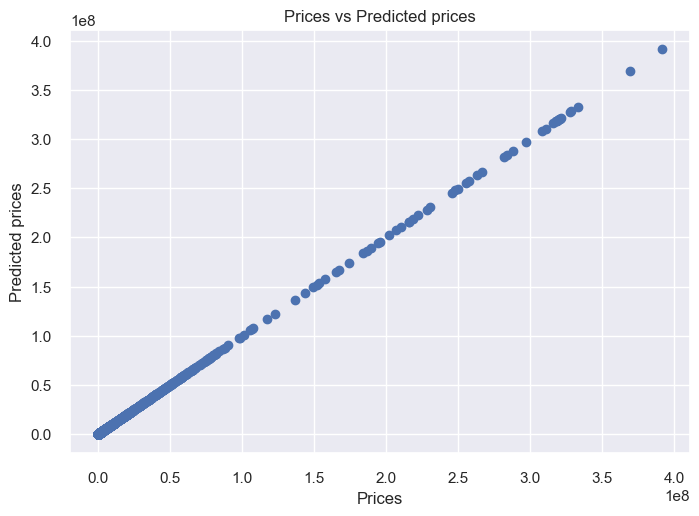

In [89]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test_MLR_1, y_pred_T_1)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

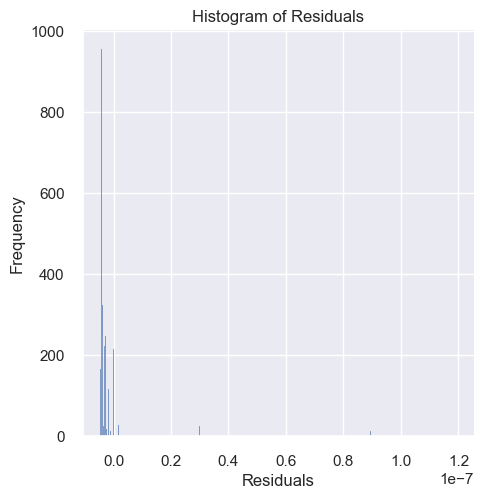

In [90]:
sns.displot(y_test_MLR_1-y_pred_T_1)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

---------------

### 2.2) Multiple Linear Regression (MLR) with df_fillna

In [91]:
# Spliting target variable and independent variables
X_MLR_2 = df_fillna.drop(['country','iso_code','date','vaccines','source_name','source_website'], axis = 1)
y_MLR_2 = df_fillna['total_vaccinations']

In [92]:
# Splitting to training and testing data

X_train_MLR_2, X_test_MLR_2, y_train_MLR_2, y_test_MLR_2 = train_test_split(X_MLR_2,y_MLR_2, test_size = 0.25, random_state = 22)

In [93]:
# Create a Linear regressor
mlr_2 = LinearRegression()

# Train the model using the training sets 
mlr_2.fit(X_train_MLR_2, y_train_MLR_2)

LinearRegression()

In [94]:
mlr_2.intercept_

-0.005393078550696373

In [95]:
mlr_2.coef_

array([ 1.00000000e+00,  1.92517587e-16, -3.93181972e-16,  1.47424855e-14,
       -1.94881612e-14,  2.51433992e-10, -1.69392133e-09,  2.21333948e-09,
        2.45879792e-13, -7.57576709e-09,  7.40625519e-09,  2.18487484e-07,
        2.66835929e-06])

In [96]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train_MLR_2.columns,mlr_2.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

Attribute Coefficients
0                    total_vaccinations          1.0
1                     people_vaccinated          0.0
2               people_fully_vaccinated         -0.0
3                daily_vaccinations_raw          0.0
4                    daily_vaccinations         -0.0
5        total_vaccinations_per_hundred          0.0
6         people_vaccinated_per_hundred         -0.0
7   people_fully_vaccinated_per_hundred          0.0
8        daily_vaccinations_per_million          0.0
9                               Day_num         -0.0
10                                  Day          0.0
11                                Month          0.0
12                                 Year     0.000003

In [97]:
# Model prediction on train data
y_pred_t_2 = mlr_2.predict(X_train_MLR_2)
y_pred_T_2 = mlr_2.predict(X_test_MLR_2)

In [98]:
# Model Train Evaluation
print('R^2(train):',metrics.r2_score(y_train_MLR_2, y_pred_t_2))
print('MAE(train):',metrics.mean_absolute_error(y_train_MLR_2, y_pred_t_2))
print('MSE(train):',metrics.mean_squared_error(y_train_MLR_2, y_pred_t_2))
print('RMSE(train):',np.sqrt(metrics.mean_squared_error(y_train_MLR_2, y_pred_t_2)))

R^2(train): 1.0
MAE(train): 3.020052516196401e-07
MSE(train): 2.182405019757648e-12
RMSE(train): 1.4772965239780565e-06


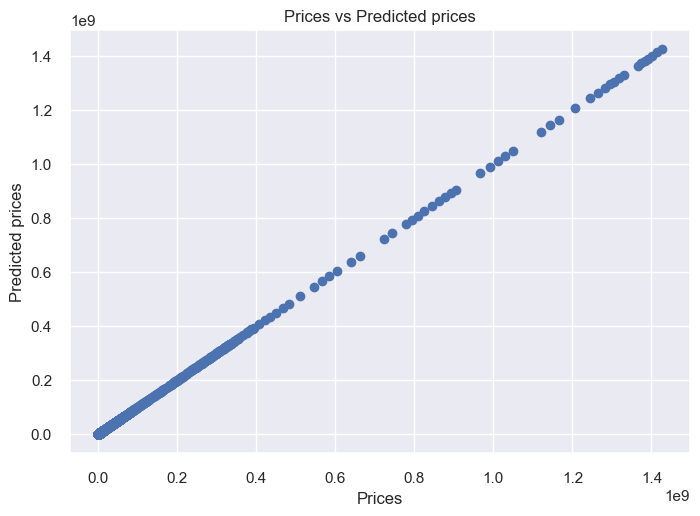

In [99]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train_MLR_2, y_pred_t_2)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

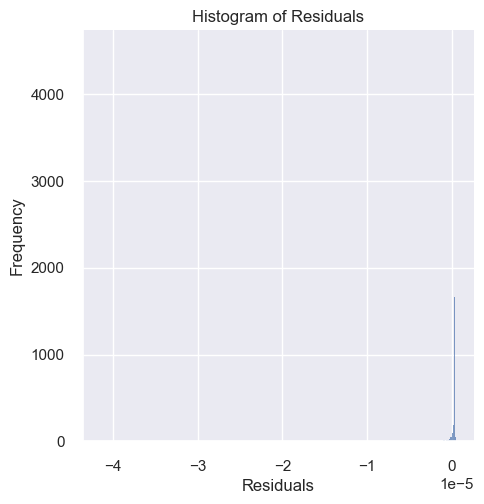

In [100]:
sns.displot(y_train_MLR_2-y_pred_t_2)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [101]:
# Model Test Evaluation
print('R^2(test):',metrics.r2_score(y_test_MLR_2, y_pred_T_2))
print('MAE(test):',metrics.mean_absolute_error(y_test_MLR_2, y_pred_T_2))
print('MSE(test):',metrics.mean_squared_error(y_test_MLR_2, y_pred_T_2))
print('RMSE(test):',np.sqrt(metrics.mean_squared_error(y_test_MLR_2, y_pred_T_2)))

R^2(test): 1.0
MAE(test): 2.849620311134384e-07
MSE(test): 1.8526835711332487e-12
RMSE(test): 1.3611331937519006e-06


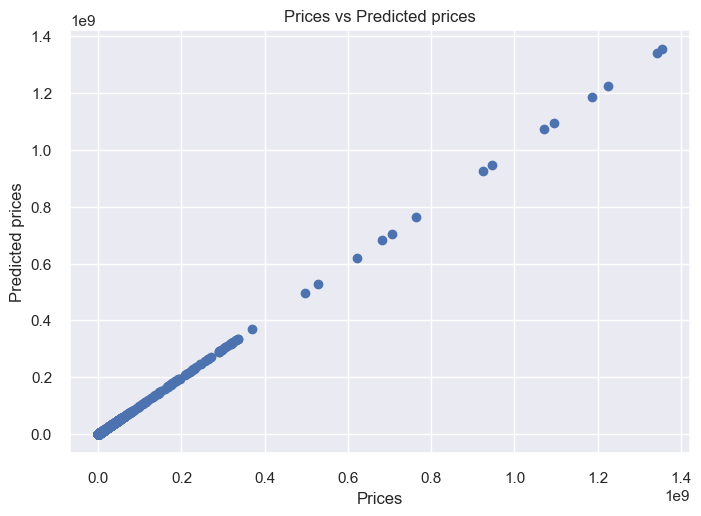

In [102]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test_MLR_2, y_pred_T_2)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

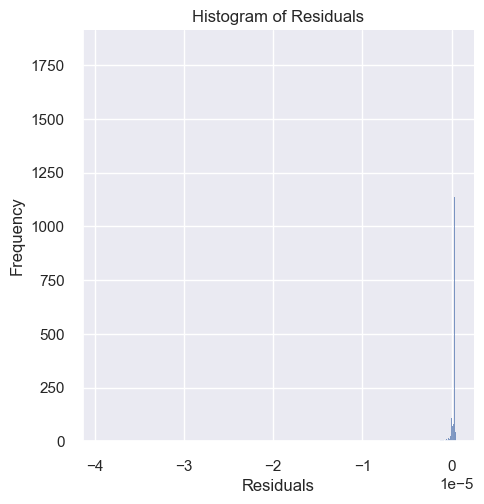

In [103]:
sns.displot(y_test_MLR_2-y_pred_T_2)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

-----------------

### 3.1) Polynomial Regression (PR) with df_dropna

In [104]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_PR_1, X_test_PR_1, y_train_PR_1, y_test_PR_1 = X_train_MLR_1, X_test_MLR_1, y_train_MLR_1, y_test_MLR_1
X_train_PR_1_quadratic = poly_features.fit_transform(X_train_PR_1)
   
# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(X_train_PR_1_quadratic, y_train_PR_1)
     
# predicting on training data-set
y_train_PR_1_quadratic_predicted = quadratic.predict(X_train_PR_1_quadratic)
   
# predicting on test data-set
y_test_PR_1_quadratic_predicted = quadratic.predict(poly_features.fit_transform(X_test_PR_1))

In [105]:
# Model Train Evaluation
print('R^2(train):',metrics.r2_score(y_train_PR_1, y_train_PR_1_quadratic_predicted))
print('MAE(train):',metrics.mean_absolute_error(y_train_PR_1, y_train_PR_1_quadratic_predicted))
print('MSE(train):',metrics.mean_squared_error(y_train_PR_1, y_train_PR_1_quadratic_predicted))
print('RMSE(train):',np.sqrt(metrics.mean_squared_error(y_train_PR_1, y_train_PR_1_quadratic_predicted)))

R^2(train): 0.999999999999996
MAE(train): 0.9806896702695254
MSE(train): 5.069681186487381
RMSE(train): 2.2515952537006694


In [106]:
# Model Test Evaluation
print('R^2(test):',metrics.r2_score(y_test_PR_1, y_test_PR_1_quadratic_predicted))
print('MAE(test):',metrics.mean_absolute_error(y_test_PR_1, y_test_PR_1_quadratic_predicted))
print('MSE(test):',metrics.mean_squared_error(y_test_PR_1, y_test_PR_1_quadratic_predicted))
print('RMSE(test):',np.sqrt(metrics.mean_squared_error(y_test_PR_1, y_test_PR_1_quadratic_predicted)))

R^2(test): 0.9999999999999928
MAE(test): 1.0475972694482238
MSE(test): 8.938879873618129
RMSE(test): 2.989795958525954


In [107]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=3)
   
# transform the features to higher degree features.
X_train_PR_1_cubic = poly_features.fit_transform(X_train_PR_1)
# fit the transformed features to Linear Regression
cubic = LinearRegression()

cubic.fit(X_train_PR_1_cubic, y_train_PR_1)
     
# predicting on training data-set
y_train_PR_1_cubic_predicted = cubic.predict(X_train_PR_1_cubic)
   
# predicting on test data-set
y_test_PR_1_cubic_predicted = cubic.predict(poly_features.fit_transform(X_test_PR_1))

In [108]:
metrics.r2_score(y_train_PR_1, y_train_PR_1_cubic_predicted)

0.999999903465608

In [109]:
metrics.r2_score(y_test_PR_1, y_test_PR_1_cubic_predicted)

0.9999993563614769

----------------

### 3.2) Polynomial Regression (PR) with df_fillna

In [110]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_PR_2, X_test_PR_2, y_train_PR_2, y_test_PR_2 = X_train_MLR_2, X_test_MLR_2, y_train_MLR_2, y_test_MLR_2
X_train_PR_2_quadratic = poly_features.fit_transform(X_train_PR_2)
   
# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(X_train_PR_2_quadratic, y_train_PR_2)
     
# predicting on training data-set
y_train_PR_2_quadratic_predicted = quadratic.predict(X_train_PR_2_quadratic)
   
# predicting on test data-set
y_test_PR_2_quadratic_predicted = quadratic.predict(poly_features.fit_transform(X_test_PR_2))

In [111]:
# Model Train Evaluation
print('R^2(train):',metrics.r2_score(y_train_PR_2, y_train_PR_2_quadratic_predicted))
print('MAE(train):',metrics.mean_absolute_error(y_train_PR_2, y_train_PR_2_quadratic_predicted))
print('MSE(train):',metrics.mean_squared_error(y_train_PR_2, y_train_PR_2_quadratic_predicted))
print('RMSE(train):',np.sqrt(metrics.mean_squared_error(y_train_PR_2, y_train_PR_2_quadratic_predicted)))

R^2(train): 0.9999999999997462
MAE(train): 14.228115557771734
MSE(train): 646.1719376221362
RMSE(train): 25.419912226877106


In [112]:
# Model Test Evaluation
print('R^2(test):',metrics.r2_score(y_test_PR_2, y_test_PR_2_quadratic_predicted))
print('MAE(test):',metrics.mean_absolute_error(y_test_PR_2, y_test_PR_2_quadratic_predicted))
print('MSE(test):',metrics.mean_squared_error(y_test_PR_2, y_test_PR_2_quadratic_predicted))
print('RMSE(test):',np.sqrt(metrics.mean_squared_error(y_test_PR_2, y_test_PR_2_quadratic_predicted)))

R^2(test): 0.9999999999996717
MAE(test): 14.730264154202397
MSE(test): 709.4019262510593
RMSE(test): 26.634600170662583


In [113]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=3)
   
# transform the features to higher degree features.
X_train_PR_2_cubic = poly_features.fit_transform(X_train_PR_2)
# fit the transformed features to Linear Regression
cubic = LinearRegression()

cubic.fit(X_train_PR_2_cubic, y_train_PR_2)
     
# predicting on training data-set
y_train_PR_2_cubic_predicted = cubic.predict(X_train_PR_2_cubic)
   
# predicting on test data-set
y_test_PR_2_cubic_predicted = cubic.predict(poly_features.fit_transform(X_test_PR_2))

In [114]:
metrics.r2_score(y_train_PR_2, y_train_PR_2_cubic_predicted)

0.9999759905728653

In [115]:
metrics.r2_score(y_test_PR_2, y_test_PR_2_cubic_predicted)

0.9999080080539244

-----------------

### 4.1) KNN Regressor with df_dropna

In [116]:
X_KNN_1 = df_dropna['people_vaccinated']
Y_KNN_1 = df_dropna['total_vaccinations']

In [117]:
X_train_KNN_1, X_test_KNN_1 , y_train_KNN_1 , y_test_KNN_1 = train_test_split(X_KNN_1,Y_KNN_1,test_size=0.25,random_state=41)

In [118]:
X_train_KNN_1 = X_train_KNN_1.to_numpy()
X_train_KNN_1 = np.reshape(X_train_KNN_1, (8828, 1))
y_train_KNN_1 = y_train_KNN_1.to_numpy()

X_test_KNN_1 = X_test_KNN_1.to_numpy()
X_test_KNN_1 = np.reshape(X_test_KNN_1, (2943, 1))
y_test_KNN_1 = y_test_KNN_1.to_numpy()

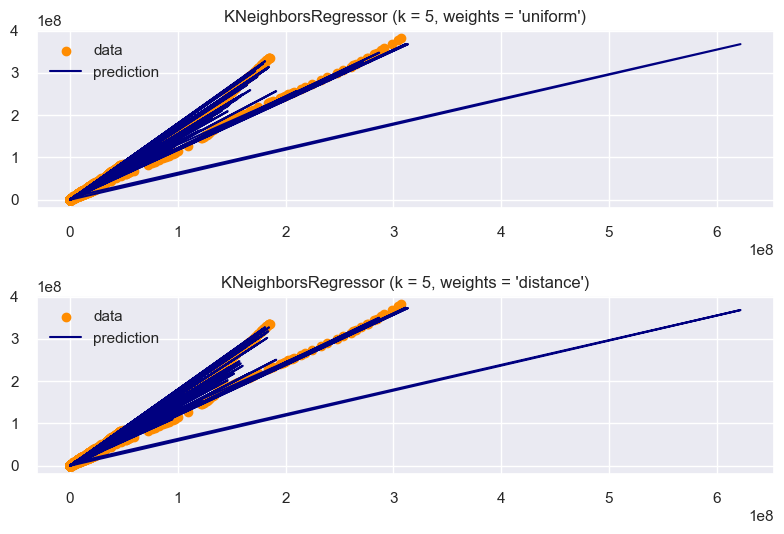

In [119]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X_train_KNN_1, y_train_KNN_1).predict(X_test_KNN_1)
    plt.subplot(2, 1, i + 1)
    plt.scatter(X_train_KNN_1, y_train_KNN_1, color="darkorange", label="data")
    plt.plot(X_test_KNN_1, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()


--------------

### 4.2) KNN Regressor with df_fillna

In [120]:
X_KNN_2 = df_fillna['daily_vaccinations']
Y_KNN_2 = df_fillna['total_vaccinations']

In [121]:
X_train_KNN_2, X_test_KNN_2 , y_train_KNN_2 , y_test_KNN_2 = train_test_split(X_KNN_2,Y_KNN_2,test_size=0.25,random_state=42)

In [122]:
X_test_KNN_2.shape

(7810,)

In [123]:
X_train_KNN_2 = X_train_KNN_2.to_numpy()
X_train_KNN_2 = np.reshape(X_train_KNN_2, (23430, 1))
y_train_KNN_2 = y_train_KNN_2.to_numpy()

X_test_KNN_2 = X_test_KNN_2.to_numpy()
X_test_KNN_2 = np.reshape(X_test_KNN_2, (7810, 1))
y_test_KNN_2 = y_test_KNN_2.to_numpy()

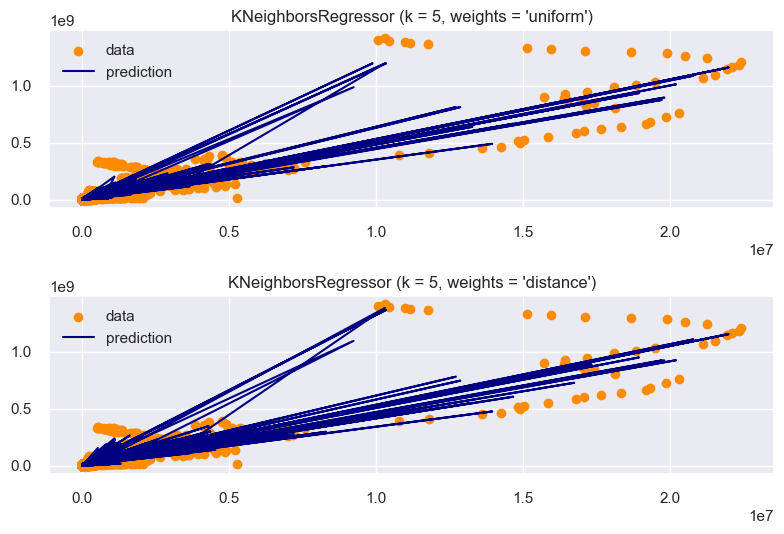

In [124]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X_train_KNN_2, y_train_KNN_2).predict(X_test_KNN_2)
    plt.subplot(2, 1, i + 1)
    plt.scatter(X_train_KNN_2, y_train_KNN_2, color="darkorange", label="data")
    plt.plot(X_test_KNN_2, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

--------------

### 5.1) Decision Tree Regressor (DTR) with df_dropna

In [125]:
X_DTR_1 = df_dropna.iloc[:,4:5].values
y_DTR_1 = df_dropna.iloc[:,3].values

In [126]:
X_train_DTR_1, X_test_DTR_1, y_train_DTR_1, y_test_DTR_1 = train_test_split(X_DTR_1, y_DTR_1, test_size = 0.25, random_state = 51)

In [127]:
# Training the Decision Tree Regression model on the whole dataset
regressor_DTR_1 = DecisionTreeRegressor(random_state = 51)
regressor_DTR_1.fit(X_DTR_1, y_DTR_1)

DecisionTreeRegressor(random_state=51)

In [128]:
y_pred_DTR_1=regressor_DTR_1.predict(X_test_DTR_1)
y_pred_DTR_1

array([1412849.,  705852., 3680329., ...,   26927., 1156931., 4142944.])

In [129]:
y_test_DTR_1

array([1412849.,  705852., 3680329., ...,   26927., 1156931., 4142944.])

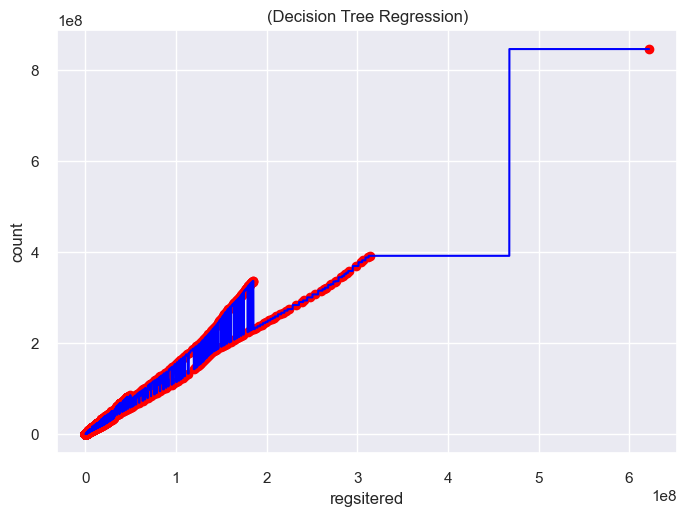

In [130]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X_DTR_1), max(X_DTR_1), 100)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_DTR_1, y_DTR_1, color = 'red')
plt.plot(X_grid, regressor_DTR_1.predict(X_grid), color = 'blue')
plt.title('(Decision Tree Regression)')
plt.xlabel('regsitered')
plt.ylabel('count')
plt.show()

--------------------

### 5.2) Decision Tree Regressor (DTR) with df_fillna

In [131]:
X_DTR_2 = df_fillna.iloc[:,7:8].values
y_DTR_2 = df_fillna.iloc[:,3].values

In [132]:
X_train_DTR_2, X_test_DTR_2, y_train_DTR_2, y_test_DTR_2 = train_test_split(X_DTR_2, y_DTR_2, test_size = 0.25, random_state = 52)

In [133]:
# Training the Decision Tree Regression model on the whole dataset
regressor_DTR_2 = DecisionTreeRegressor(random_state = 52)
regressor_DTR_2.fit(X_DTR_2, y_DTR_2)

DecisionTreeRegressor(random_state=52)

In [134]:
y_pred_DTR_2=regressor_DTR_2.predict(X_test_DTR_2)
y_pred_DTR_2

array([1.20044352e+07, 1.42662510e+07, 8.70774740e+07, ...,
       3.76163333e+04, 6.47000000e+05, 2.17765000e+05])

In [135]:
y_pred_DTR_2

array([1.20044352e+07, 1.42662510e+07, 8.70774740e+07, ...,
       3.76163333e+04, 6.47000000e+05, 2.17765000e+05])

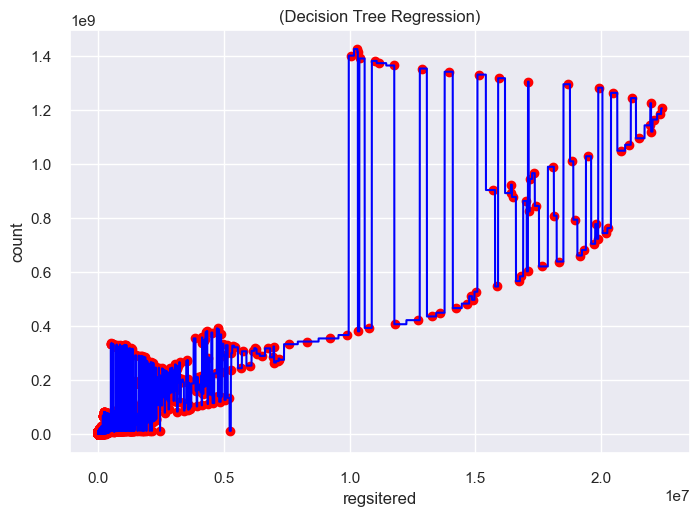

In [136]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X_DTR_2), max(X_DTR_2), 100)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_DTR_2, y_DTR_2, color = 'red')
plt.plot(X_grid, regressor_DTR_2.predict(X_grid), color = 'blue')
plt.title('(Decision Tree Regression)')
plt.xlabel('regsitered')
plt.ylabel('count')
plt.show()

-------------------

### 6.1) Random Forest Regressor (RFR) with df_dropna

In [137]:
X_RFR_1 = df_dropna.iloc[:,4:5].values
y_RFR_1 = df_dropna.iloc[:,3].values

In [138]:
X_train_RFR_1, X_test_RFR_1, y_train_RFR_1, y_test_RFR_1 = train_test_split(X_RFR_1, y_RFR_1, test_size = 0.25, random_state = 61)

In [139]:
regressor_RFR_1 = RandomForestRegressor(n_estimators = 10, random_state = 61)
regressor_RFR_1.fit(X_RFR_1,y_RFR_1)

RandomForestRegressor(n_estimators=10, random_state=61)

In [140]:
y_pred_RFR_1=regressor_RFR_1.predict(X_test_RFR_1)
y_pred_RFR_1

array([  74933.4,  407854.4, 7207823. , ..., 1358745.4,  162629.3,
        505184. ])

In [141]:
y_test_RFR_1

array([  76977.,  406758., 7289615., ..., 1408531.,  198781.,  553814.])

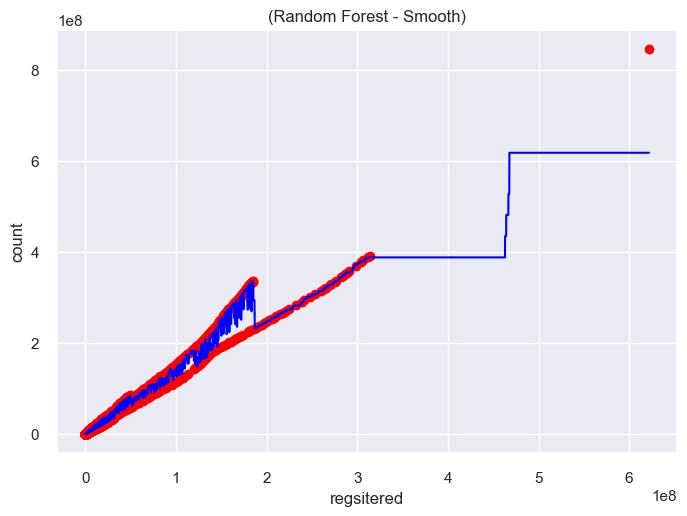

In [142]:
#higher resolution graph
X_grid = np.arange(min(X_RFR_1),max(X_RFR_1),100)
X_grid = X_grid.reshape(len(X_grid),1) 
  
plt.scatter(X_RFR_1,y_RFR_1, color='red') #plotting real points
plt.plot(X_grid, regressor_RFR_1.predict(X_grid),color='blue') #plotting for predict points
  
plt.title("(Random Forest - Smooth)")
plt.xlabel('regsitered')
plt.ylabel('count')
plt.show()

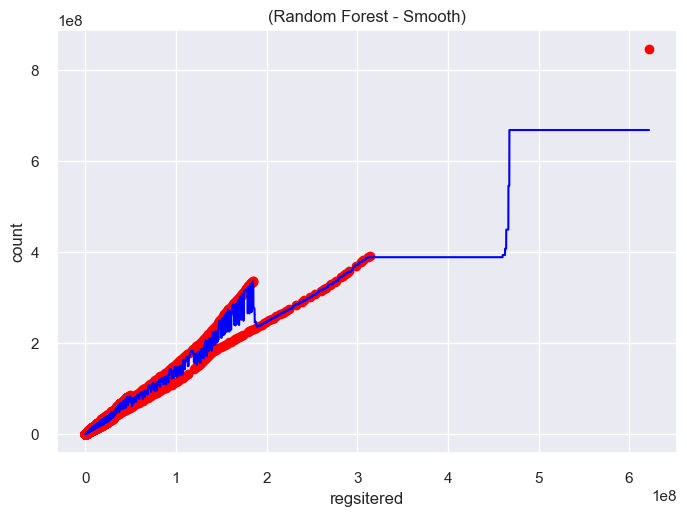

In [143]:
# for 100 trees
regressor_RFR_1_100 = RandomForestRegressor(n_estimators = 100, random_state = 61)
regressor_RFR_1_100.fit(X_RFR_1,y_RFR_1)
 
#higher resolution graph
X_grid = np.arange(min(X_RFR_1),max(X_RFR_1),100)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X_RFR_1,y_RFR_1, color='red') 
  
plt.plot(X_grid, regressor_RFR_1_100.predict(X_grid),color='blue') 
plt.title("(Random Forest - Smooth)")
plt.xlabel('regsitered')
plt.ylabel('count')
plt.show()

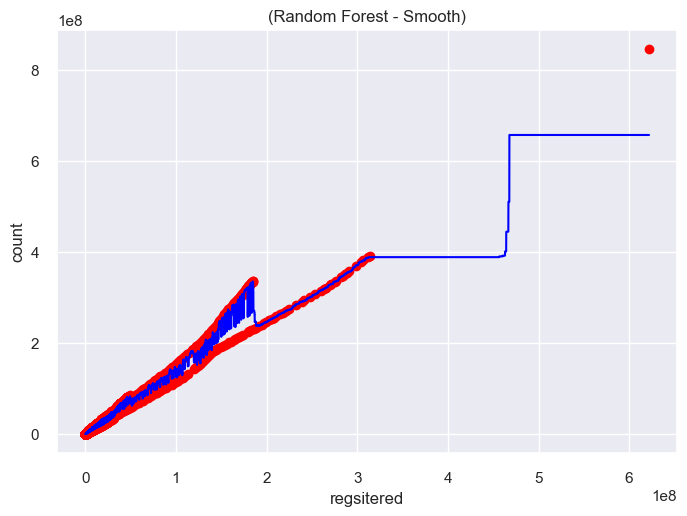

In [144]:
# for 300 trees
regressor_RFR_1_300 = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor_RFR_1_300.fit(X_RFR_1,y_RFR_1)
 
#higher resolution graph
X_grid = np.arange(min(X_RFR_1),max(X_RFR_1),100)
X_grid = X_grid.reshape(len(X_grid),1) 
  
plt.scatter(X_RFR_1,y_RFR_1, color='red') #plotting real points
plt.plot(X_grid, regressor_RFR_1_300.predict(X_grid),color='blue') #plotting for predict points
  
plt.title("(Random Forest - Smooth)")
plt.xlabel('regsitered')
plt.ylabel('count')
plt.show()

--------------

### 6.2) Random Forest Regressor (RFR) with df_fillna

In [145]:
X_RFR_2 = df_fillna.iloc[:,7:8].values
y_RFR_2 = df_fillna.iloc[:,3].values

In [146]:
X_train_RFR_2, X_test_RFR_2, y_train_RFR_2, y_test_RFR_2 = train_test_split(X_RFR_2, y_RFR_2, test_size = 0.25, random_state = 62)

In [147]:
regressor_RFR_2 = RandomForestRegressor(n_estimators = 10, random_state = 62)
regressor_RFR_2.fit(X_RFR_2,y_RFR_2)

RandomForestRegressor(n_estimators=10, random_state=62)

In [148]:
y_pred_RFR_2=regressor_RFR_2.predict(X_test_RFR_2)
y_pred_RFR_2

array([ 7738242.20369641, 10740191.82314175,  7497698.77565965, ...,
       10976007.63818913,  1270647.12498424, 12004435.24984242])

In [149]:
y_test_RFR_2

array([2.91621000e+05, 1.20044352e+07, 7.39400000e+03, ...,
       1.20044352e+07, 6.69140000e+04, 1.20044352e+07])

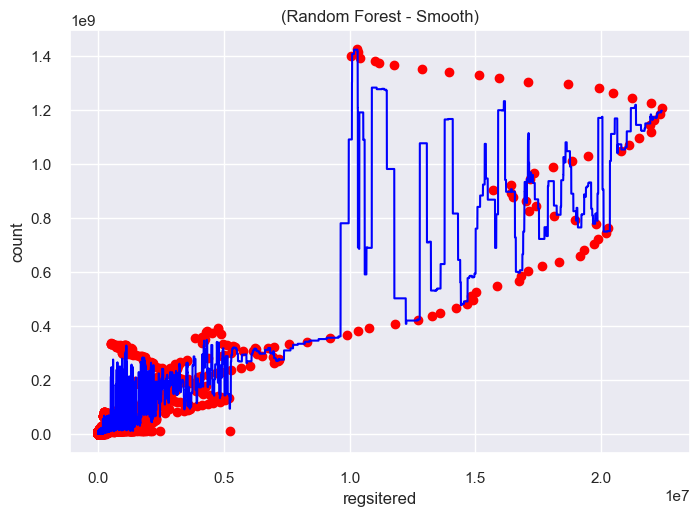

In [150]:
#higher resolution graph
X_grid = np.arange(min(X_RFR_2),max(X_RFR_2),100)
X_grid = X_grid.reshape(len(X_grid),1) 
  
plt.scatter(X_RFR_2,y_RFR_2, color='red') #plotting real points
plt.plot(X_grid, regressor_RFR_2.predict(X_grid),color='blue') #plotting for predict points
  
plt.title("(Random Forest - Smooth)")
plt.xlabel('regsitered')
plt.ylabel('count')
plt.show()

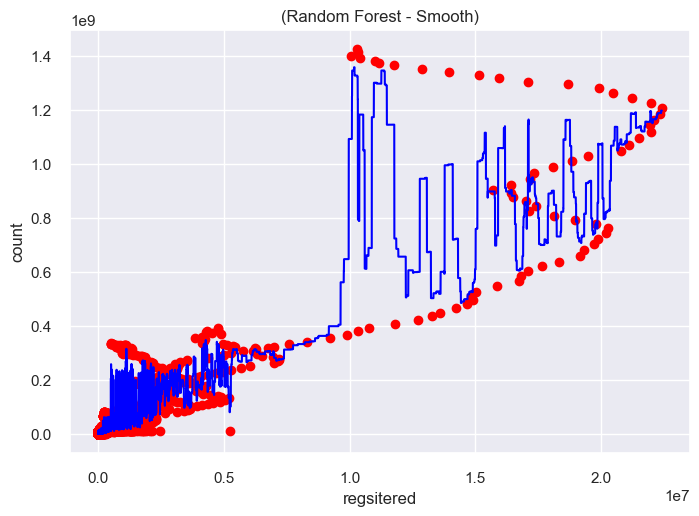

In [151]:
# for 100 trees
regressor_RFR_2_100 = RandomForestRegressor(n_estimators = 100, random_state = 62)
regressor_RFR_2_100.fit(X_RFR_2,y_RFR_2)
 
#higher resolution graph
X_grid = np.arange(min(X_RFR_1),max(X_RFR_2),100)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X_RFR_2,y_RFR_2, color='red') 
  
plt.plot(X_grid, regressor_RFR_2_100.predict(X_grid),color='blue') 
plt.title("(Random Forest - Smooth)")
plt.xlabel('regsitered')
plt.ylabel('count')
plt.show()

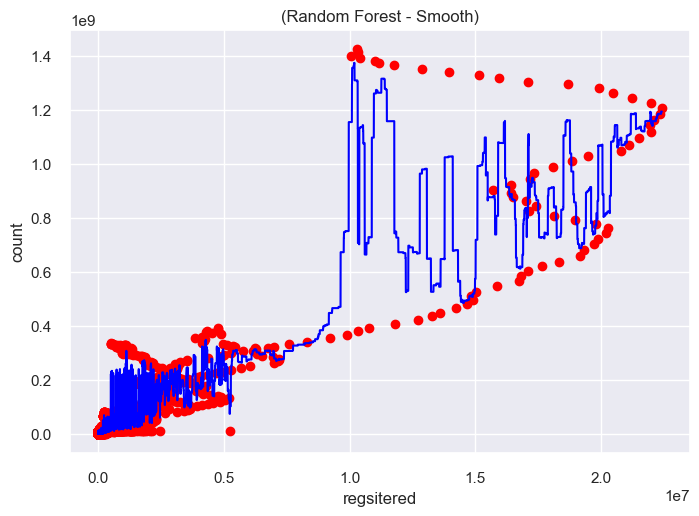

In [152]:
# for 300 trees
regressor_RFR_2_300 = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor_RFR_2_300.fit(X_RFR_2,y_RFR_2)
 
#higher resolution graph
X_grid = np.arange(min(X_RFR_2),max(X_RFR_2),100)
X_grid = X_grid.reshape(len(X_grid),1) 
  
plt.scatter(X_RFR_2,y_RFR_2, color='red') #plotting real points
plt.plot(X_grid, regressor_RFR_2_300.predict(X_grid),color='blue') #plotting for predict points
  
plt.title("(Random Forest - Smooth)")
plt.xlabel('regsitered')
plt.ylabel('count')
plt.show()

--------------------------------------------------------

### 7.1) Pycaret with df_dropna

In [153]:
setup(data = df_dropna, target = 'total_vaccinations', session_id = 71)

(5,
 <MLUsecase.REGRESSION: 2>,
 [('Setup Config',
                                  Description               Value
   0                               session_id                  71
   1                                   Target  total_vaccinations
   2                            Original Data         (11771, 19)
   3                           Missing Values               False
   4                         Numeric Features                  10
   5                     Categorical Features                   7
   6                         Ordinal Features               False
   7                High Cardinality Features               False
   8                  High Cardinality Method                None
   9                    Transformed Train Set         (8239, 147)
   10                    Transformed Test Set         (3532, 147)
   11                      Shuffle Train-Test                True
   12                     Stratify Train-Test               False
   13                    

In [154]:
best_1 = compare_models() 

In [155]:
best_1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [169]:
et_1 = create_model('et')

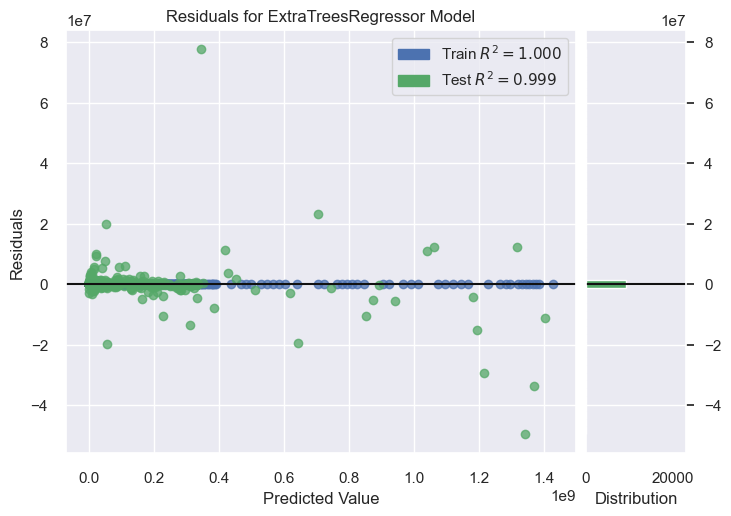

In [170]:
plot_model(et_1)

In [171]:
evaluate_model(et_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [172]:
predict_model(et_1)

people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0             8217124.0                6435535.0            1.614120e+05   
1               88703.0                  25164.0            7.350000e+03   
2           167191088.0               43258808.0            1.784772e+06   
3               57009.0                   9773.0            1.420000e+03   
4             5704550.5                3293973.5            2.273661e+05   
...                 ...                      ...                     ...   
9368          5704550.5                3293973.5            2.273661e+05   
9369            72882.0                3293973.5            2.273661e+05   
9370         11991143.0                9401330.0            2.266100e+05   
9371          5704550.5                3293973.5            2.273661e+05   
9372           695612.0                  43252.0            4.262200e+04   

      daily_vaccinations  total_vaccinations_per_hundred  \
0               231844.0                       17.370001   
1                 4530.0                        2.360000   
2              2326312.0                       15.250000   
3                 4794.0                        0.350000   
4                44100.0                       29.283554   
...                  ...                             ...   
9368              1153.0                       29.283554   
9369              4437.0                        0.030000   
9370            153579.0                      110.790001   
9371             11384.0                       29.283554   
9372             39910.0                        1.960000   

      people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          9.740000                             7.630000   
1                          1.840000                             0.520000   
2                         12.120000                             3.130000   
3                          0.300000                             0.050000   
4                         19.181574                            12.340698   
...                             ...                                  ...   
9368                      19.181574                            12.340698   
9369                       0.030000                            12.340698   
9370                      62.730000                            49.180000   
9371                      19.181574                            12.340698   
9372                       1.840000                             0.110000   

      daily_vaccinations_per_million  Day_num   Day  ...  date_weekday_1  \
0                             2749.0    115.0  27.0  ...             0.0   
1                              939.0    128.0   9.0  ...             0.0   
2                             1686.0    180.0  31.0  ...             0.0   
3                              251.0     54.0  25.0  ...             0.0   
4                             2574.0     93.0   5.0  ...             0.0   
...                              ...      ...   ...  ...             ...   
9368                          5811.0    211.0   1.0  ...             0.0   
9369                            20.0     81.0  21.0  ...             0.0   
9370                          8034.0    196.0  16.0  ...             0.0   
9371                           292.0    145.0  26.0  ...             0.0   
9372                          1057.0     50.0  21.0  ...             0.0   

      date_weekday_2  date_weekday_3  date_weekday_4  date_weekday_5  \
0                0.0             0.0             0.0             1.0   
1                0.0             0.0             1.0             0.0   
2                0.0             0.0             0.0             0.0   
3                0.0             0.0             0.0             0.0   
4                0.0             0.0             1.0             0.0   
...              ...             ...             ...             ...   
9368             0.0             1.0      

---------------

### 7.2) Pycaret with df_fillna

In [160]:
setup(data = df_fillna, target = 'total_vaccinations', session_id = 72)

(5,
 <MLUsecase.REGRESSION: 2>,
 [('Setup Config',
                                  Description               Value
   0                               session_id                  72
   1                                   Target  total_vaccinations
   2                            Original Data         (31240, 19)
   3                           Missing Values               False
   4                         Numeric Features                  10
   5                     Categorical Features                   7
   6                         Ordinal Features               False
   7                High Cardinality Features               False
   8                  High Cardinality Method                None
   9                    Transformed Train Set        (21867, 207)
   10                    Transformed Test Set         (9373, 207)
   11                      Shuffle Train-Test                True
   12                     Stratify Train-Test               False
   13                    

In [161]:
best_2 = compare_models() 

In [162]:
best_2

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=72, verbose=0, warm_start=False)

In [163]:
et_2 = create_model('et')

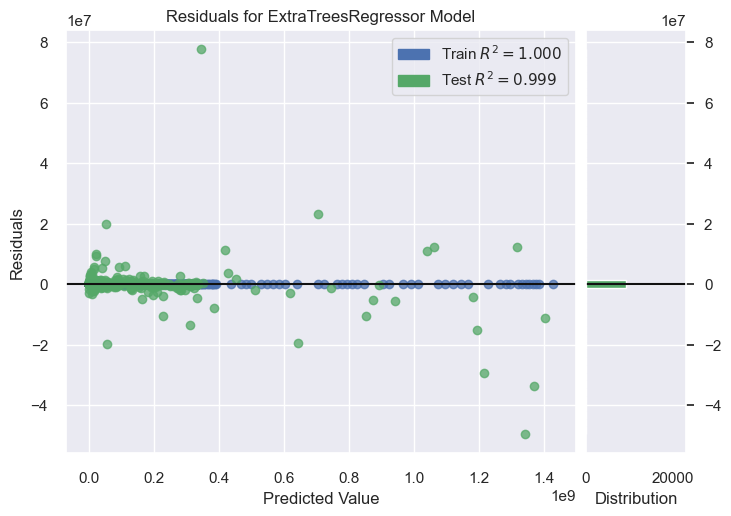

In [164]:
plot_model(et_2)

In [165]:
evaluate_model(et_2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [166]:
predict_model(et_2)

people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0             8217124.0                6435535.0            1.614120e+05   
1               88703.0                  25164.0            7.350000e+03   
2           167191088.0               43258808.0            1.784772e+06   
3               57009.0                   9773.0            1.420000e+03   
4             5704550.5                3293973.5            2.273661e+05   
...                 ...                      ...                     ...   
9368          5704550.5                3293973.5            2.273661e+05   
9369            72882.0                3293973.5            2.273661e+05   
9370         11991143.0                9401330.0            2.266100e+05   
9371          5704550.5                3293973.5            2.273661e+05   
9372           695612.0                  43252.0            4.262200e+04   

      daily_vaccinations  total_vaccinations_per_hundred  \
0               231844.0                       17.370001   
1                 4530.0                        2.360000   
2              2326312.0                       15.250000   
3                 4794.0                        0.350000   
4                44100.0                       29.283554   
...                  ...                             ...   
9368              1153.0                       29.283554   
9369              4437.0                        0.030000   
9370            153579.0                      110.790001   
9371             11384.0                       29.283554   
9372             39910.0                        1.960000   

      people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          9.740000                             7.630000   
1                          1.840000                             0.520000   
2                         12.120000                             3.130000   
3                          0.300000                             0.050000   
4                         19.181574                            12.340698   
...                             ...                                  ...   
9368                      19.181574                            12.340698   
9369                       0.030000                            12.340698   
9370                      62.730000                            49.180000   
9371                      19.181574                            12.340698   
9372                       1.840000                             0.110000   

      daily_vaccinations_per_million  Day_num   Day  ...  date_weekday_1  \
0                             2749.0    115.0  27.0  ...             0.0   
1                              939.0    128.0   9.0  ...             0.0   
2                             1686.0    180.0  31.0  ...             0.0   
3                              251.0     54.0  25.0  ...             0.0   
4                             2574.0     93.0   5.0  ...             0.0   
...                              ...      ...   ...  ...             ...   
9368                          5811.0    211.0   1.0  ...             0.0   
9369                            20.0     81.0  21.0  ...             0.0   
9370                          8034.0    196.0  16.0  ...             0.0   
9371                           292.0    145.0  26.0  ...             0.0   
9372                          1057.0     50.0  21.0  ...             0.0   

      date_weekday_2  date_weekday_3  date_weekday_4  date_weekday_5  \
0                0.0             0.0             0.0             1.0   
1                0.0             0.0             1.0             0.0   
2                0.0             0.0             0.0             0.0   
3                0.0             0.0             0.0             0.0   
4                0.0             0.0             1.0             0.0   
...              ...             ...             ...             ...   
9368             0.0             1.0      

## Test the model and show the metrics

I did this part in last part

## Save your final model

In [173]:
save_model(et_1, 'Myet_1Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_vaccinations',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=Non

In [168]:
save_model(et_2, 'Myet_2Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_vaccinations',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=Non

## Send us the Result (Maktabkhoone)